In [233]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "flood-prediction-dataset"

# **Import**

In [234]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(skimr)

# **1. Data Import & EDA**

In [235]:
df <- read.csv('/kaggle/input/flood-prediction-dataset/flood.csv')

## **Data Description**
>**1. MonsoonIntensity: Higher volumes of rain during monsoons increase the probability of floods.**   
>
>**2. TopographyDrainage: The drainage capacity based on the region's topography. Efficient drainage can help drain rainwater and reduce the risk of floods.**   
>
>**3. RiverManagement: The quality and effectiveness of river management practices. Proper river management, including dredging and bank maintenance, can improve water flow and reduce floods.**  
>
>**4. Deforestation: The extent of deforestation in the area.* Deforestation reduces the soil's ability to absorb water, increasing surface runoff and the risk of floods.**   
>
>**5. Urbanization: The level of urbanization in the region. Urban areas have impermeable surfaces (asphalt, concrete), which reduce water infiltration, raising the risk of floods.**   
>
>**6. ClimateChange: The impact of climate change on the region. Climate change can lead to more extreme precipitation patterns, including torrential rains that can cause floods.**   
>
>**7. DamsQuality: The quality and maintenance status of dams. Well-maintained dams can control floods, and dams with structural problems can break and cause catastrophic floods.**   
>
>**8. Siltation: The extent of siltation in rivers and reservoirs. The accumulation of sediments in rivers (siltation) reduces drainage capacity and increases the risk of floods.**   
>
>**9. Agricultural Practices: The types and sustainability of agricultural practices. The intensification of agriculture can lead to deforestation, excessive use of fertilizers and pesticides, and inappropriate irrigation practices, reducing soil biodiversity and increasing the risk of floods.**   
>
>**10. Encroachments:The degree of encroachment on flood plains and natural waterways. Construction in flood-prone areas impedes the natural flow of water and increases the risk of floods.**  
>
>**11. IneffectiveDisasterPreparedness: The lack of emergency plans, warning systems, and simulations increases the negative impact of floods.**   
>
>**12. DrainageSystems: Well-maintained and adequately sized drainage systems help drain rainwater and reduce the risk of floods.**   
>
>**13. CoastalVulnerability: Low-lying coastal areas are prone to flooding from storm surges and sea level rise.**   
>
>**14. Landslides: Steep slopes and unstable soils are more prone to landslides.**   
>
>**15. Watersheds: Regions with more watersheds may have a higher or lower risk of flooding, depending on various factors.**   
>
>**16. DeterioratingInfrastructure: Clogged culverts, damaged drainage channels, and other deficient infrastructure can increase the risk of floods.**
>
>**17. PopulationScore: Densely populated areas can suffer more severe losses.**   
>
>**18. WetlandLoss: Wetlands act as natural sponges, absorbing excess water and helping to prevent floods.**   
>
>**19. InadequatePlanning: Urban planning that does not consider the risk of flooding increases the vulnerability of communities.**  
>
>**20. PoliticalFactors: Factors such as corruption and a lack of political will to invest in drainage infrastructure can make it difficult to manage flood risk.**   
>
>**21. FloodProbability: The overall probability of flooding in the region. This is the target variable for predictive analysis. This is the target Variable.**

In [236]:
str(df)

'data.frame':	50000 obs. of  21 variables:
 $ MonsoonIntensity               : int  3 8 3 4 3 6 6 7 6 4 ...
 $ TopographyDrainage             : int  8 4 10 4 7 6 7 3 3 3 ...
 $ RiverManagement                : int  6 5 4 2 5 6 4 5 5 5 ...
 $ Deforestation                  : int  6 7 1 7 2 4 5 5 4 6 ...
 $ Urbanization                   : int  4 7 7 3 5 6 5 6 5 2 ...
 $ ClimateChange                  : int  4 9 5 4 8 4 5 6 11 3 ...
 $ DamsQuality                    : int  6 1 4 1 5 3 4 6 3 7 ...
 $ Siltation                      : int  2 5 7 4 2 1 8 7 2 7 ...
 $ AgriculturalPractices          : int  3 5 4 6 7 3 8 6 9 10 ...
 $ Encroachments                  : int  2 4 9 4 5 5 4 5 7 4 ...
 $ IneffectiveDisasterPreparedness: int  5 6 2 9 7 1 6 5 8 5 ...
 $ DrainageSystems                : int  10 9 7 4 7 10 8 4 2 7 ...
 $ CoastalVulnerability           : int  7 2 4 2 6 5 4 6 8 6 ...
 $ Landslides                     : int  4 6 4 6 5 9 5 9 7 5 ...
 $ Watersheds                     : int  2

In [237]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MonsoonIntensity,1,50000,4.9914800,2.2368343,5.0,4.8986750,2.965200,0.000,16.000,16.00,0.43503540,0.15295069,0.0100034269
TopographyDrainage,2,50000,4.9841000,2.2464880,5.0,4.8831000,2.965200,0.000,18.000,18.00,0.46799810,0.20488655,0.0100465995
RiverManagement,3,50000,5.0159400,2.2313103,5.0,4.9270250,2.965200,0.000,16.000,16.00,0.43268005,0.18881122,0.0099787229
Deforestation,4,50000,5.0084800,2.2227431,5.0,4.9169000,1.482600,0.000,17.000,17.00,0.45230643,0.24518049,0.0099404093
Urbanization,5,50000,4.9890600,2.2431587,5.0,4.8903750,2.965200,0.000,17.000,17.00,0.47353435,0.29457059,0.0100317107
ClimateChange,6,50000,4.9883400,2.2267607,5.0,4.8951000,2.965200,0.000,17.000,17.00,0.44431908,0.20383469,0.0099583766
DamsQuality,7,50000,5.0153600,2.2450000,5.0,4.9218750,2.965200,0.000,16.000,16.00,0.44398593,0.17290792,0.0100399451
Siltation,8,50000,4.9886000,2.2326419,5.0,4.8921500,2.965200,0.000,16.000,16.00,0.45944308,0.21332836,0.0099846780
AgriculturalPractices,9,50000,5.0061200,2.2345878,5.0,4.9161000,2.965200,0.000,16.000,16.00,0.42546861,0.14754136,0.0099933802


In [238]:
#df %>% skim()

## **Check missing value**

In [239]:
colSums(is.na(df))

MonsoonIntensity              TopographyDrainage 
                              0                               0 
                RiverManagement                   Deforestation 
                              0                               0 
                   Urbanization                   ClimateChange 
                              0                               0 
                    DamsQuality                       Siltation 
                              0                               0 
          AgriculturalPractices                   Encroachments 
                              0                               0 
IneffectiveDisasterPreparedness                 DrainageSystems 
                              0                               0 
           CoastalVulnerability                      Landslides 
                              0                               0 
                     Watersheds     DeterioratingInfrastructure 
                              0                               0 
                PopulationScore                     WetlandLoss 
                              0                               0 
             InadequatePlanning                PoliticalFactors 
                              0                               0 
               FloodProbability 
                              0

## **Duplicate check**

In [240]:
sum(duplicated(df))

[1] 0

In [241]:
summary(df)

 MonsoonIntensity TopographyDrainage RiverManagement  Deforestation   
 Min.   : 0.000   Min.   : 0.000     Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 3.000   1st Qu.: 3.000     1st Qu.: 3.000   1st Qu.: 3.000  
 Median : 5.000   Median : 5.000     Median : 5.000   Median : 5.000  
 Mean   : 4.991   Mean   : 4.984     Mean   : 5.016   Mean   : 5.008  
 3rd Qu.: 6.000   3rd Qu.: 6.000     3rd Qu.: 6.000   3rd Qu.: 6.000  
 Max.   :16.000   Max.   :18.000     Max.   :16.000   Max.   :17.000  
  Urbanization    ClimateChange     DamsQuality       Siltation     
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 3.000   1st Qu.: 3.000   1st Qu.: 3.000   1st Qu.: 3.000  
 Median : 5.000   Median : 5.000   Median : 5.000   Median : 5.000  
 Mean   : 4.989   Mean   : 4.988   Mean   : 5.015   Mean   : 4.989  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000  
 Max.   :17.000   Max.   :17.000   Max.   :16.000   Max.   :16.000  
 AgriculturalPractic

In [242]:
head(df)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,⋯,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3,8,6,6,4,4,6,2,3,2,⋯,10,7,4,2,3,4,3,2,6,0.450
2,8,4,5,7,7,9,1,5,5,4,⋯,9,2,6,2,1,1,9,1,3,0.475
3,3,10,4,1,7,5,4,7,4,9,⋯,7,4,4,8,6,1,8,3,6,0.515
4,4,4,2,7,3,4,1,4,6,4,⋯,4,2,6,6,8,8,6,6,10,0.520
5,3,7,5,2,5,8,5,2,7,5,⋯,7,6,5,3,3,4,4,3,4,0.475
6,6,6,6,4,6,4,3,1,3,5,⋯,10,5,9,5,5,7,3,3,2,0.470


# **2. Data Visualization**

In [243]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [244]:
num_cols

[1] "MonsoonIntensity"                "TopographyDrainage"             
 [3] "RiverManagement"                 "Deforestation"                  
 [5] "Urbanization"                    "ClimateChange"                  
 [7] "DamsQuality"                     "Siltation"                      
 [9] "AgriculturalPractices"           "Encroachments"                  
[11] "IneffectiveDisasterPreparedness" "DrainageSystems"                
[13] "CoastalVulnerability"            "Landslides"                     
[15] "Watersheds"                      "DeterioratingInfrastructure"    
[17] "PopulationScore"                 "WetlandLoss"                    
[19] "InadequatePlanning"              "PoliticalFactors"               
[21] "FloodProbability"

In [245]:
options(repr.plot.width = 14.0, repr.plot.height = 10.0)

## **Histogram & Boxplot**

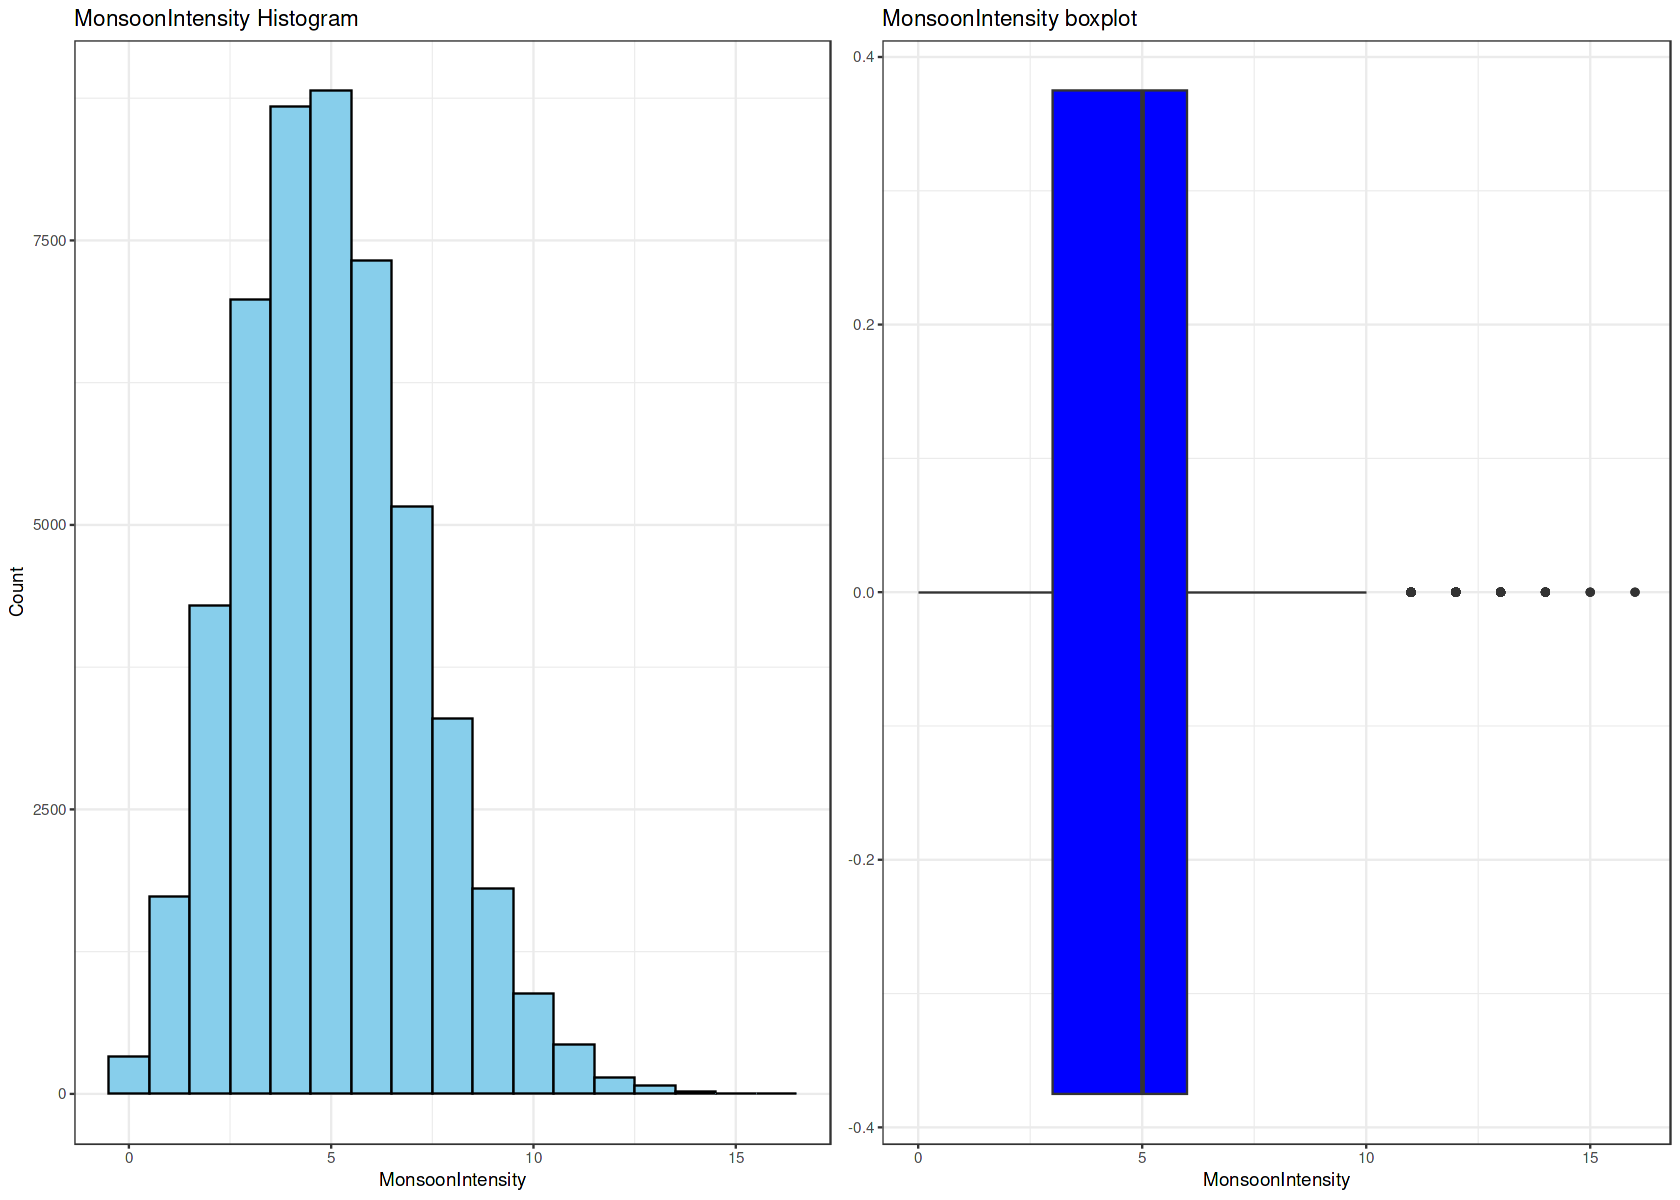

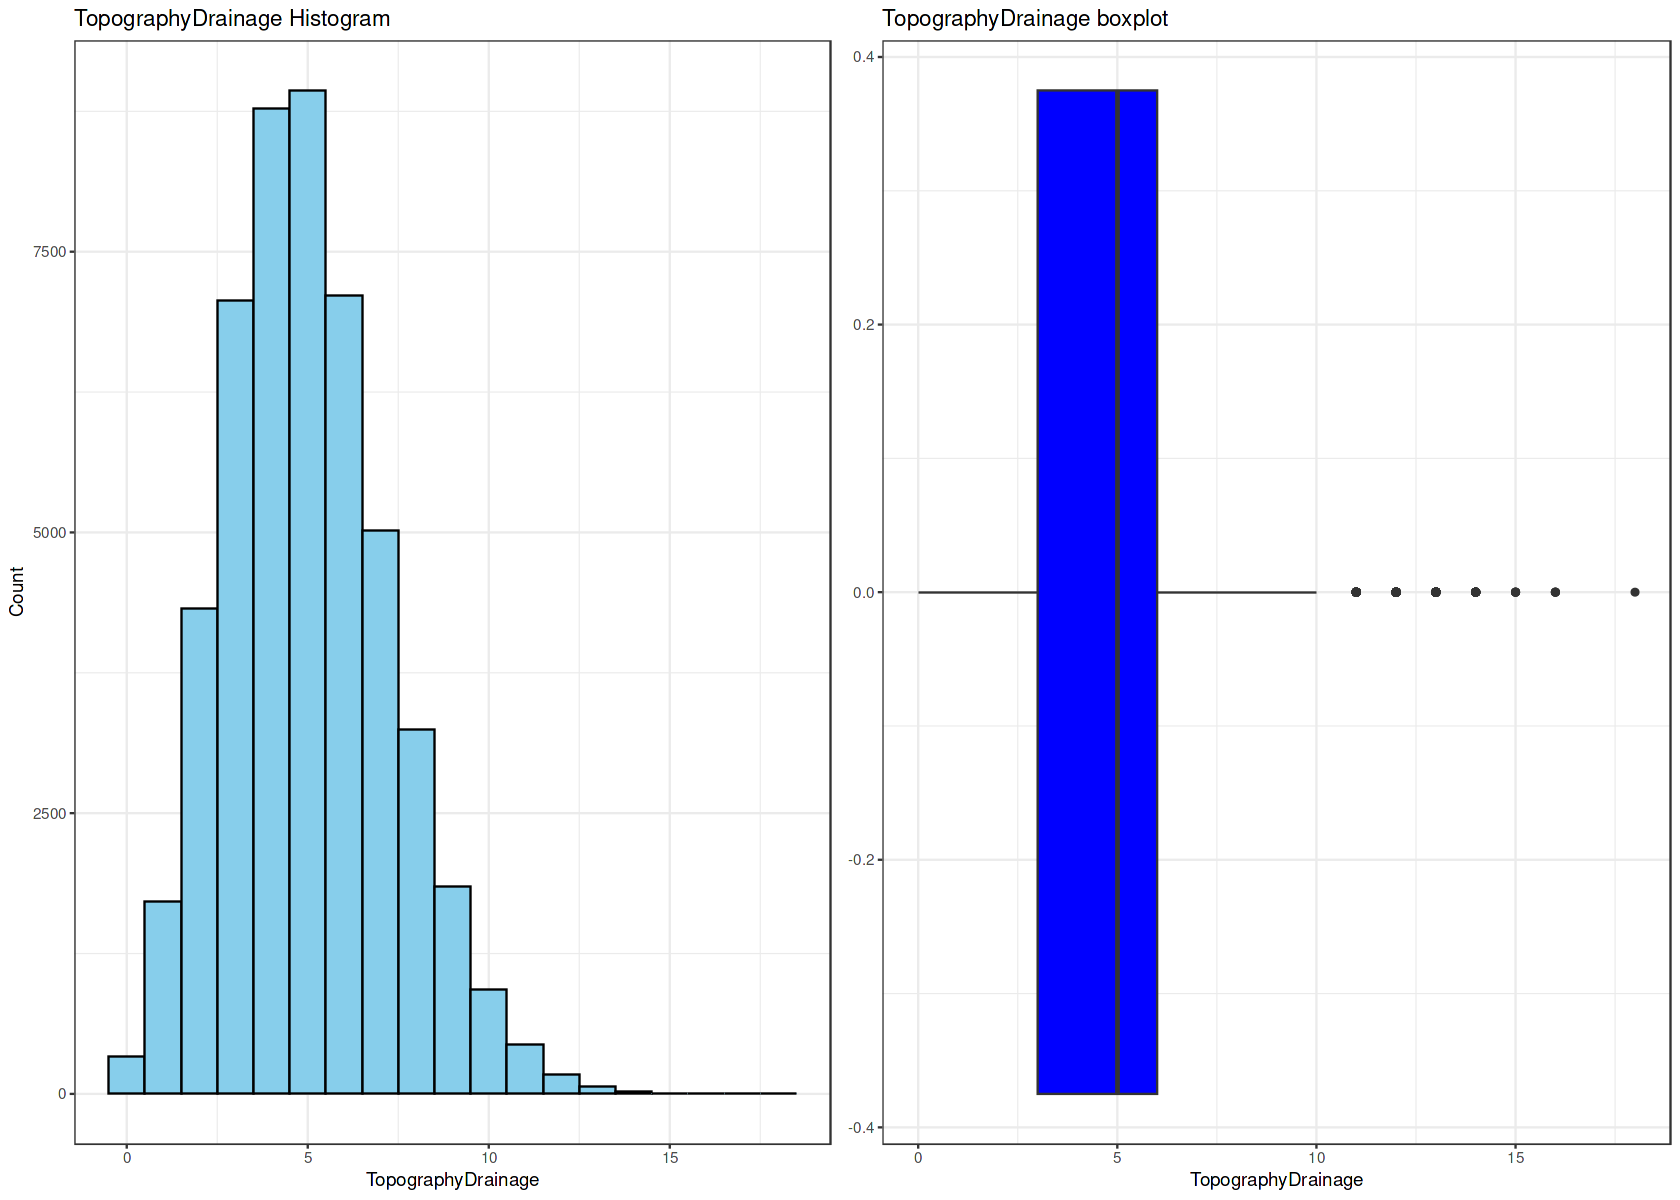

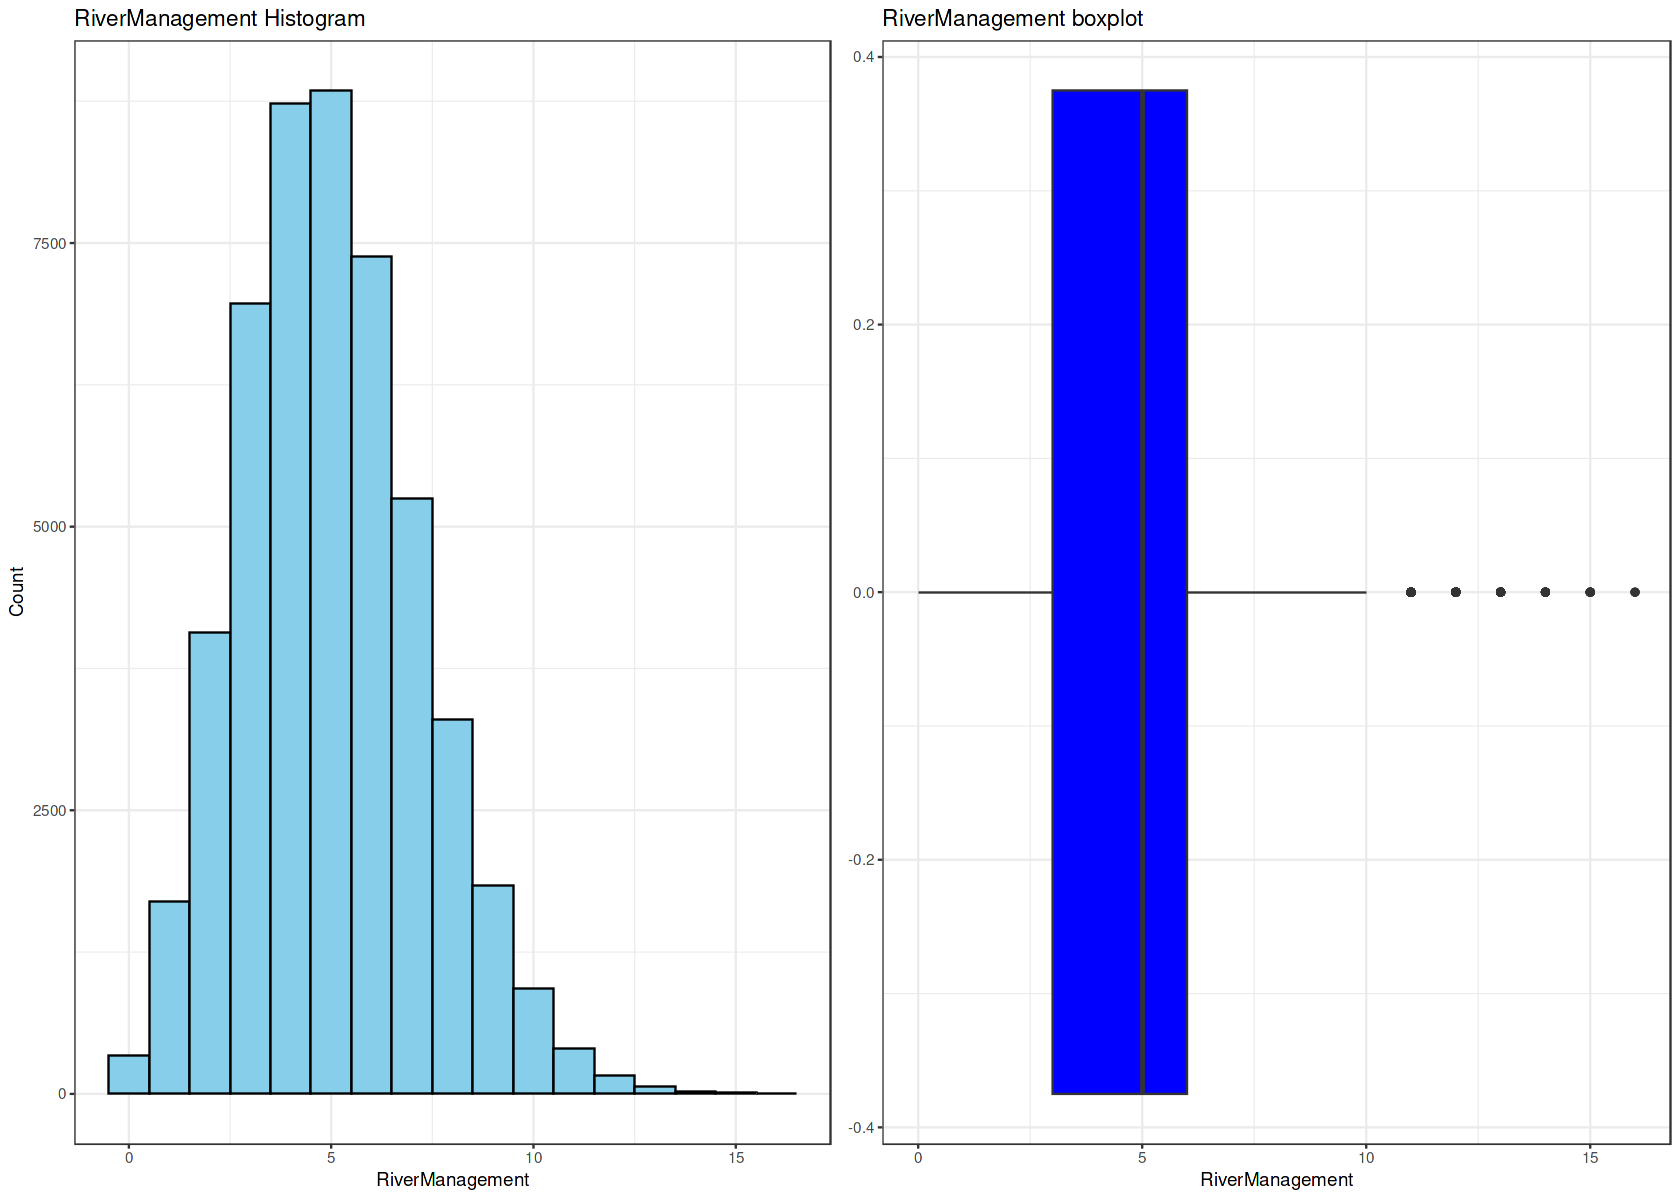

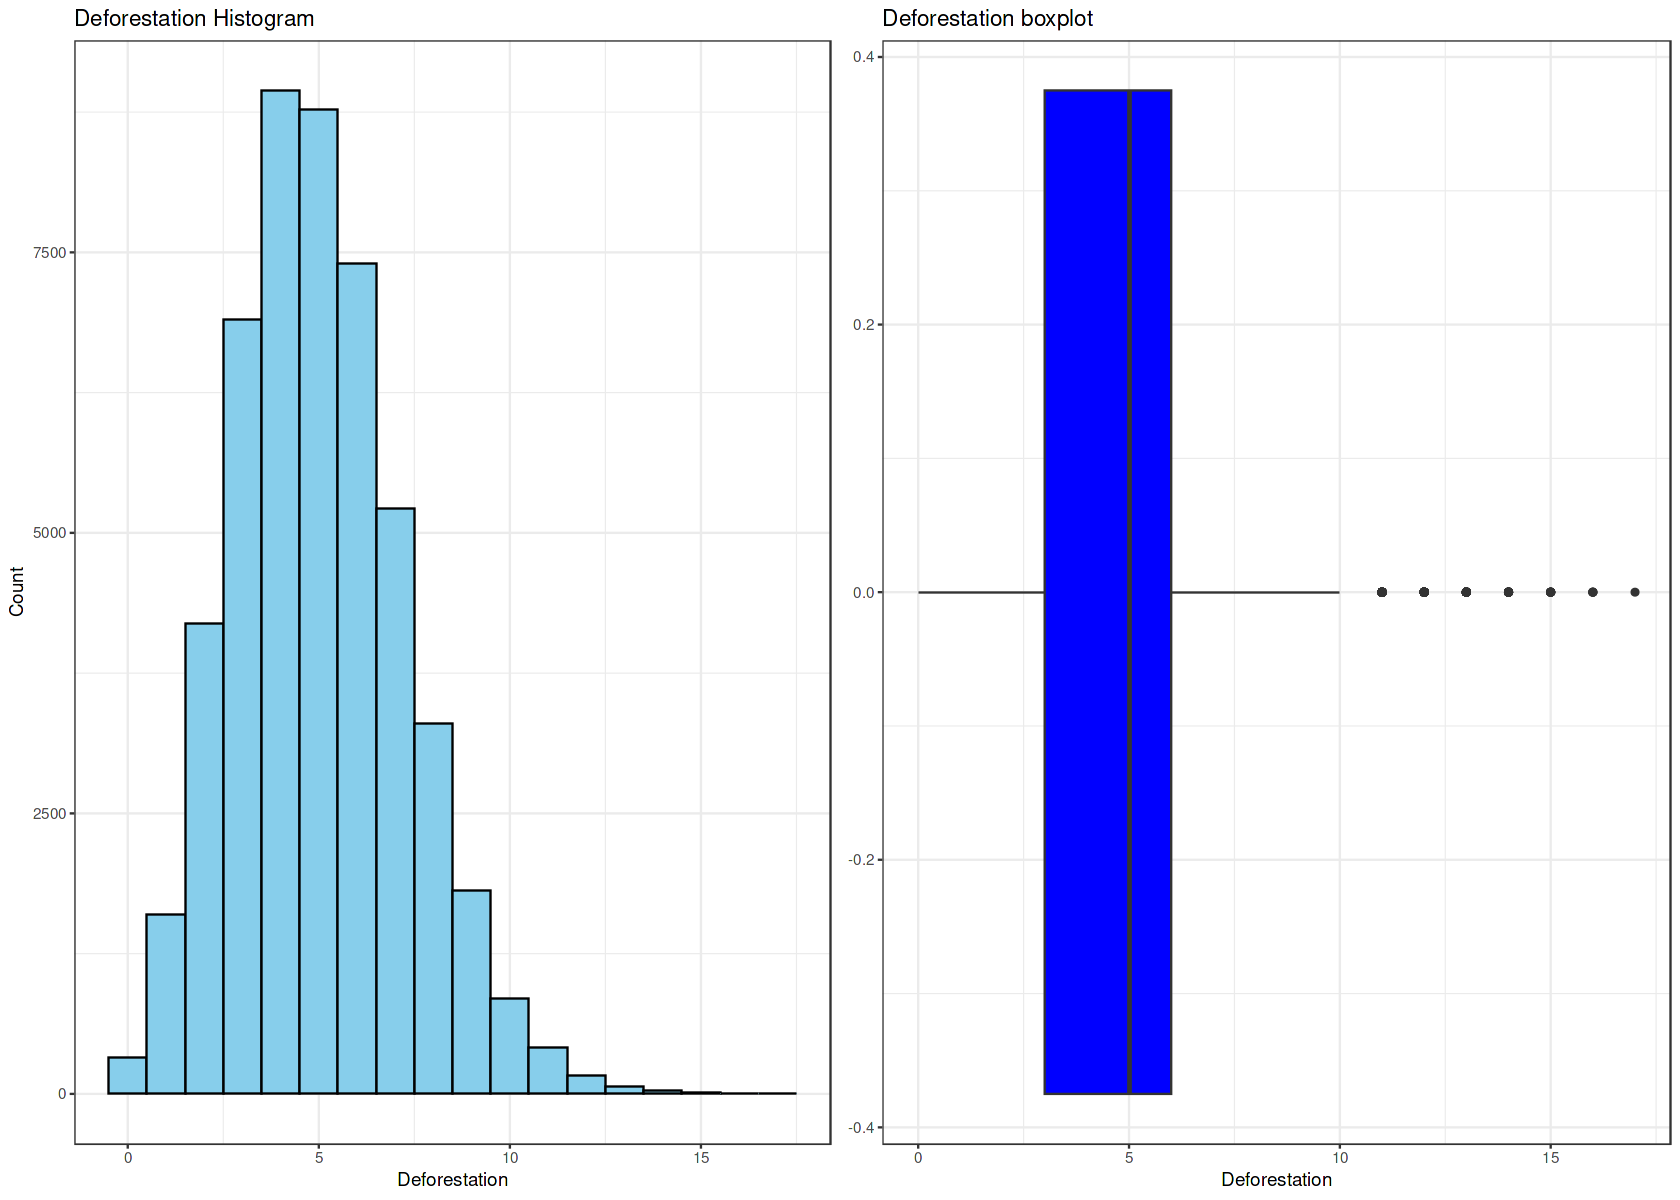

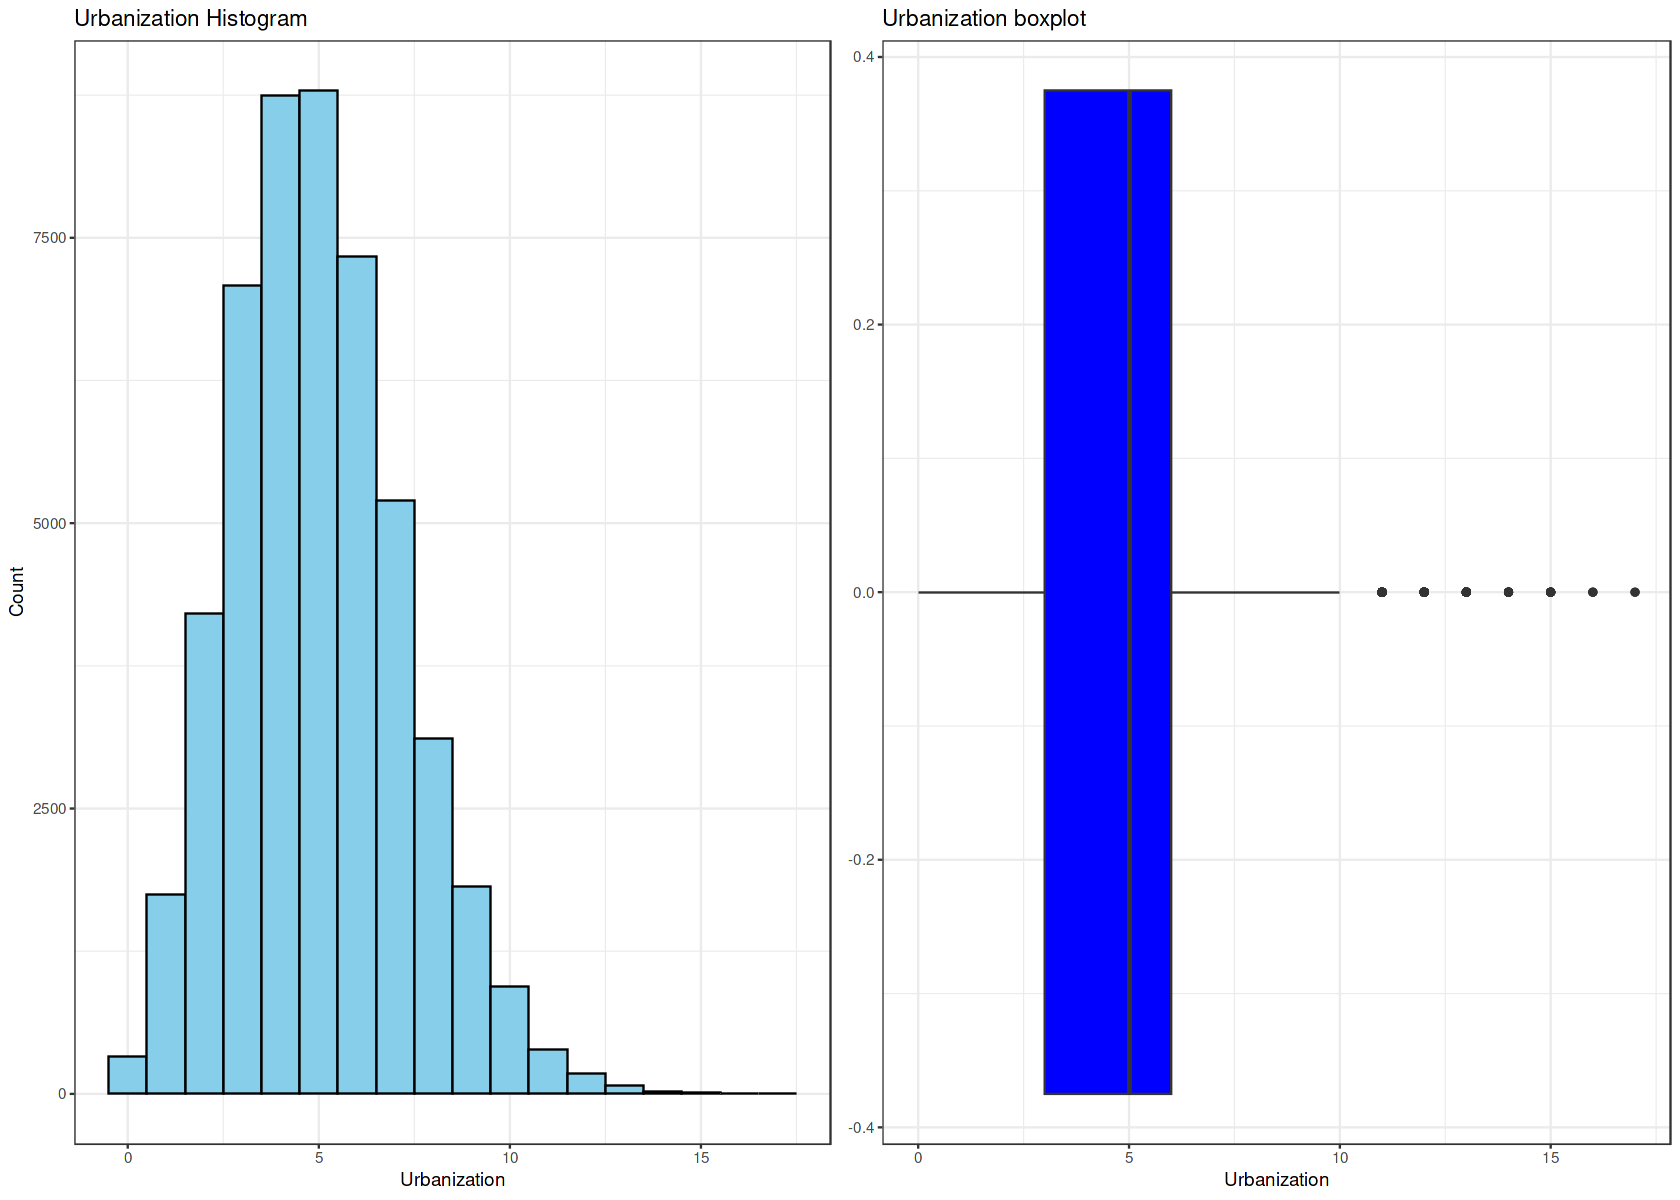

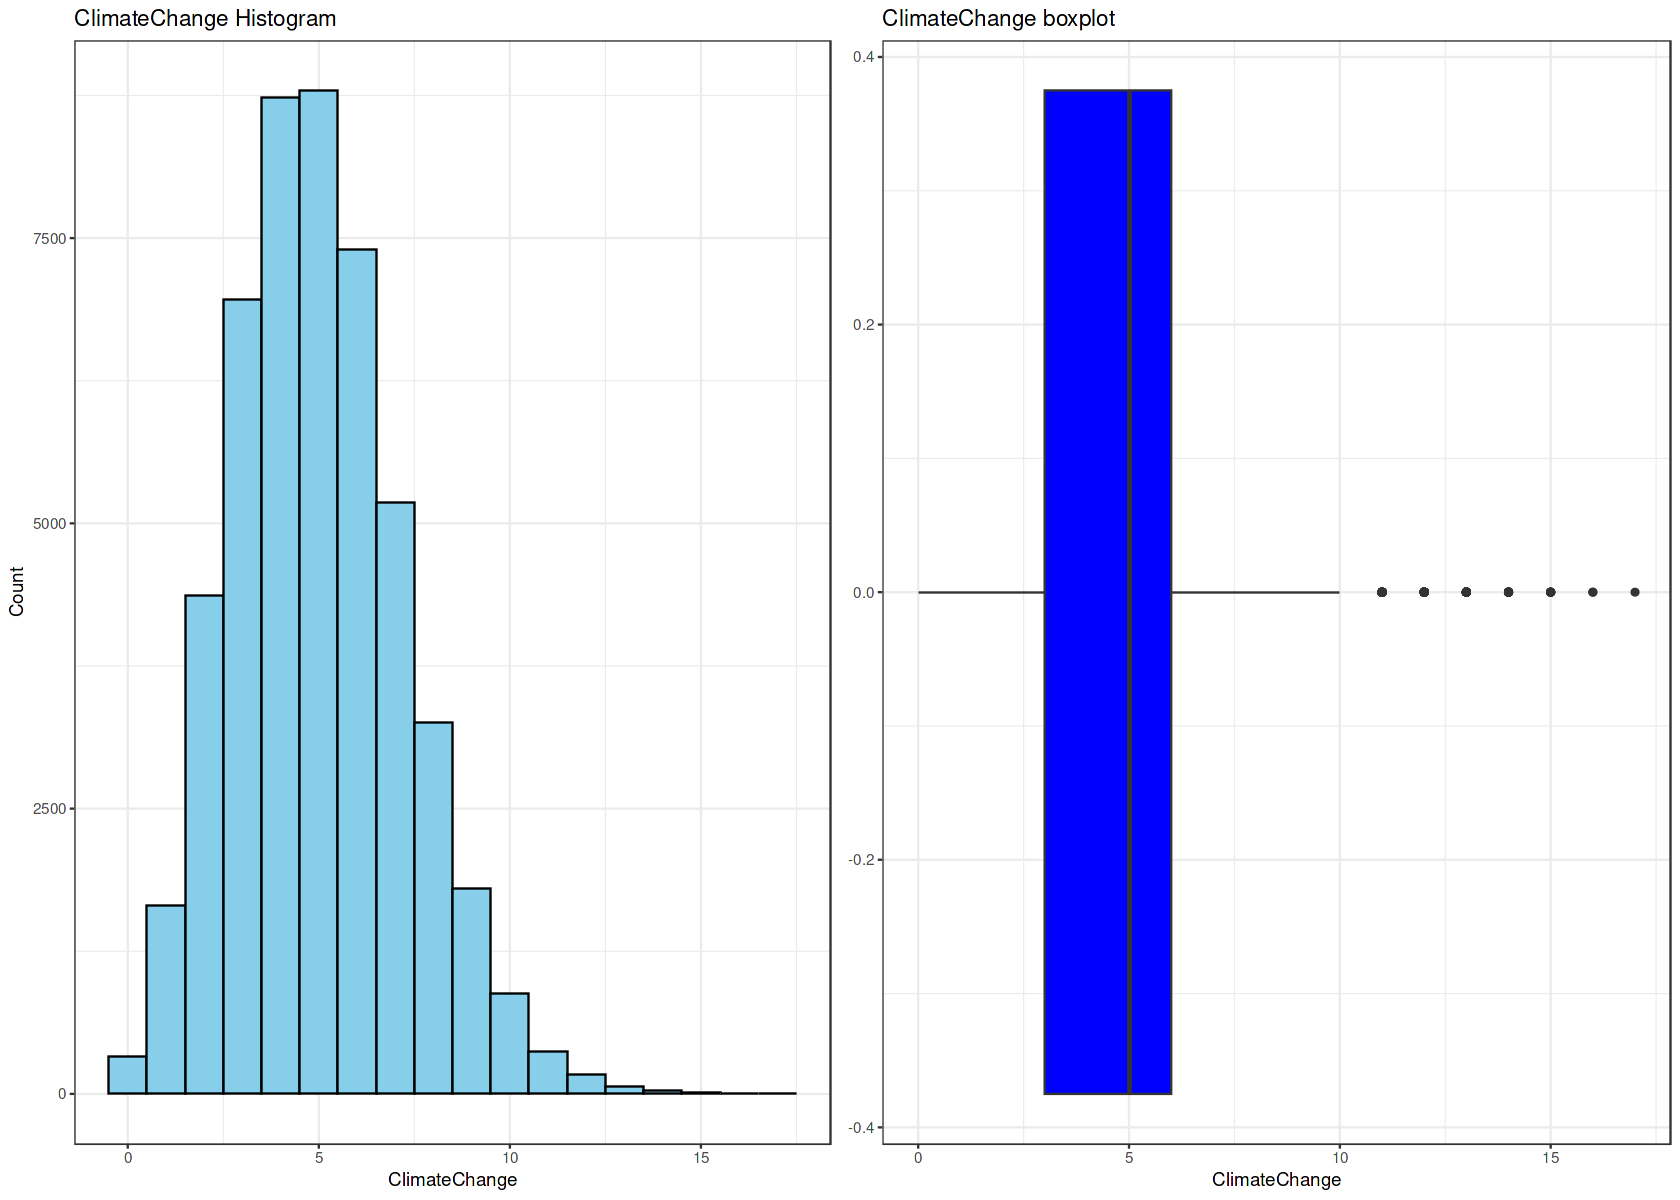

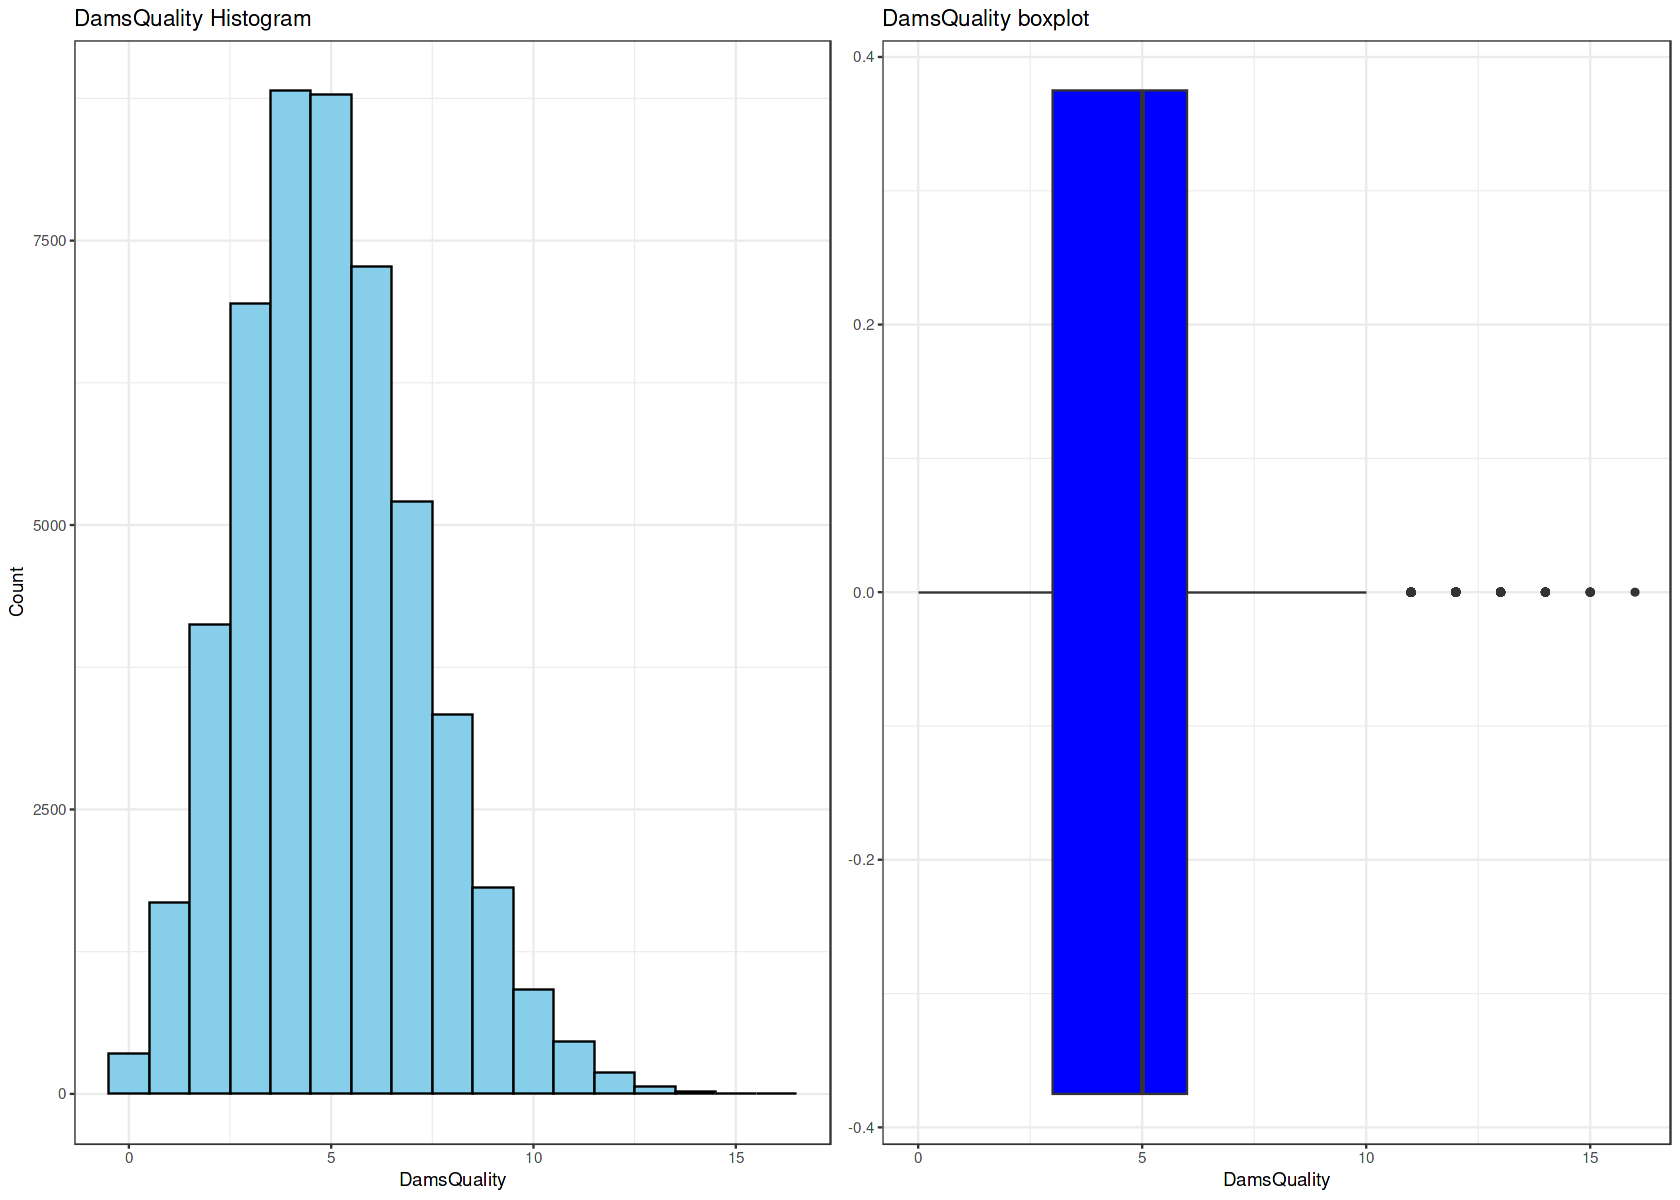

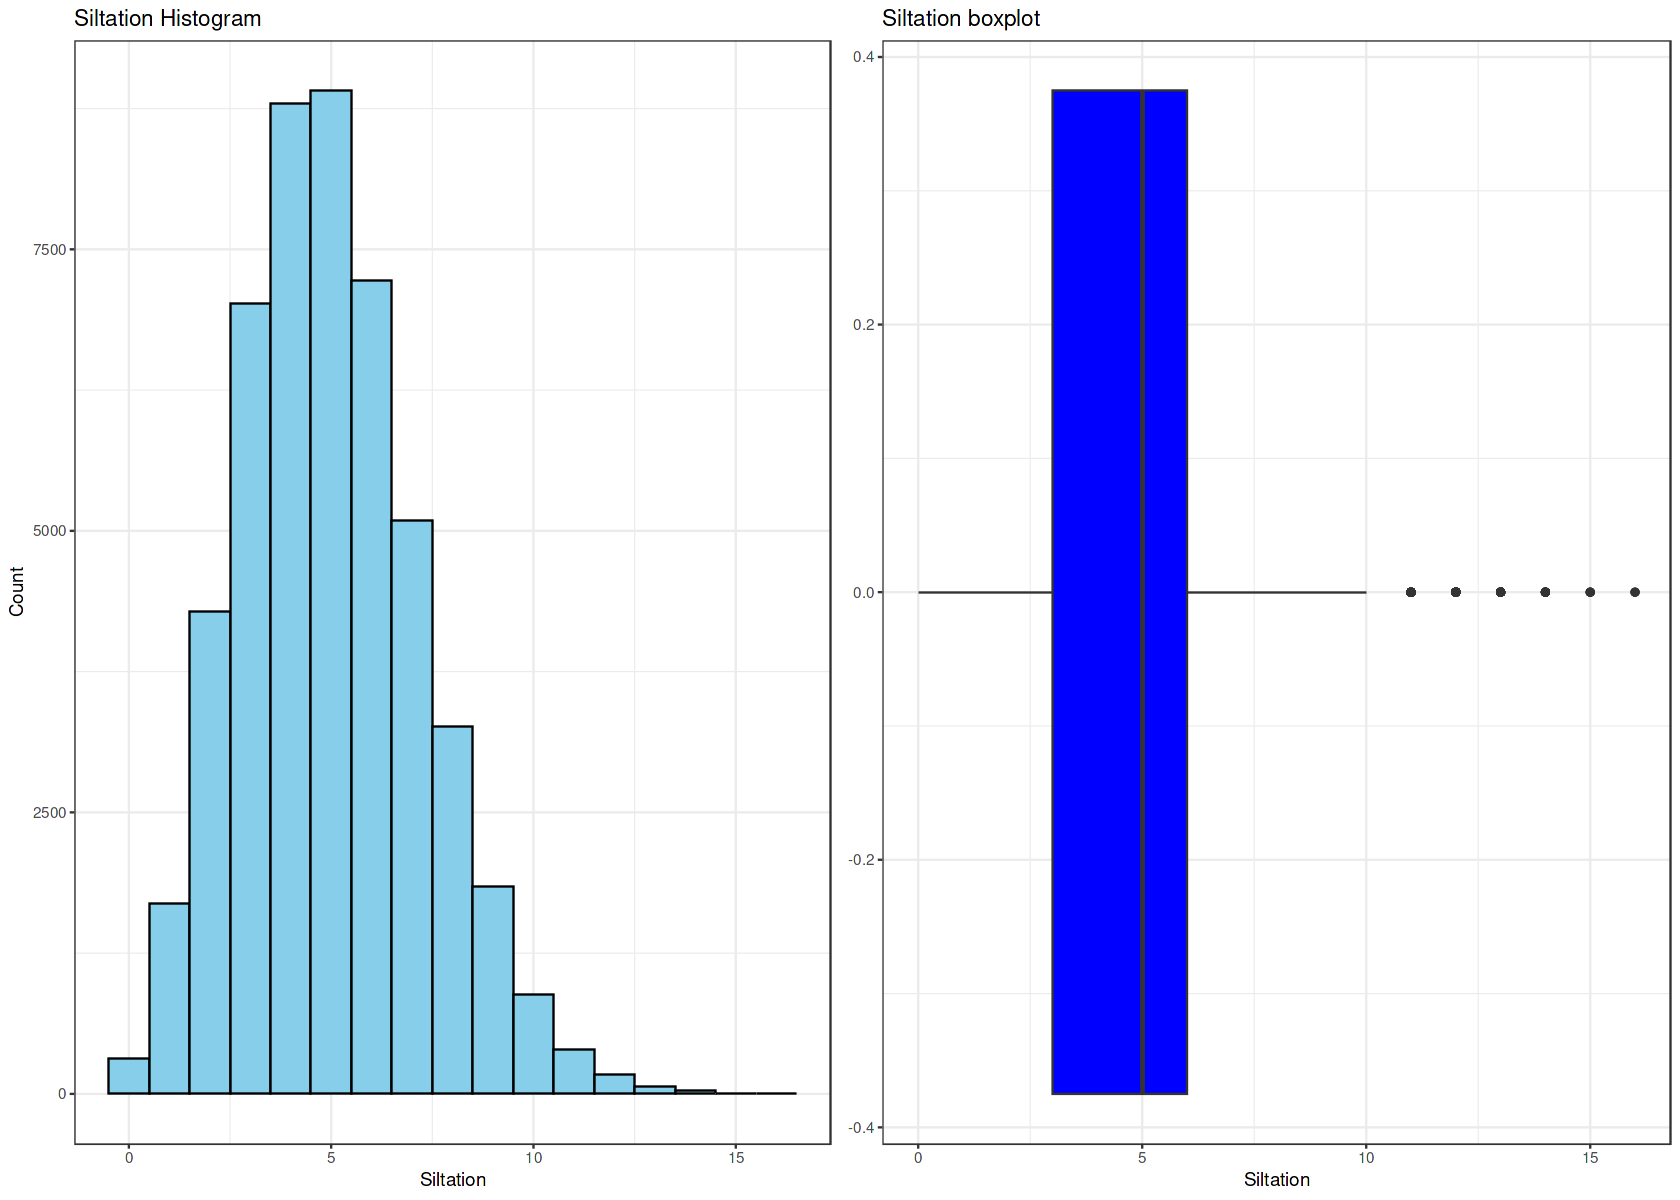

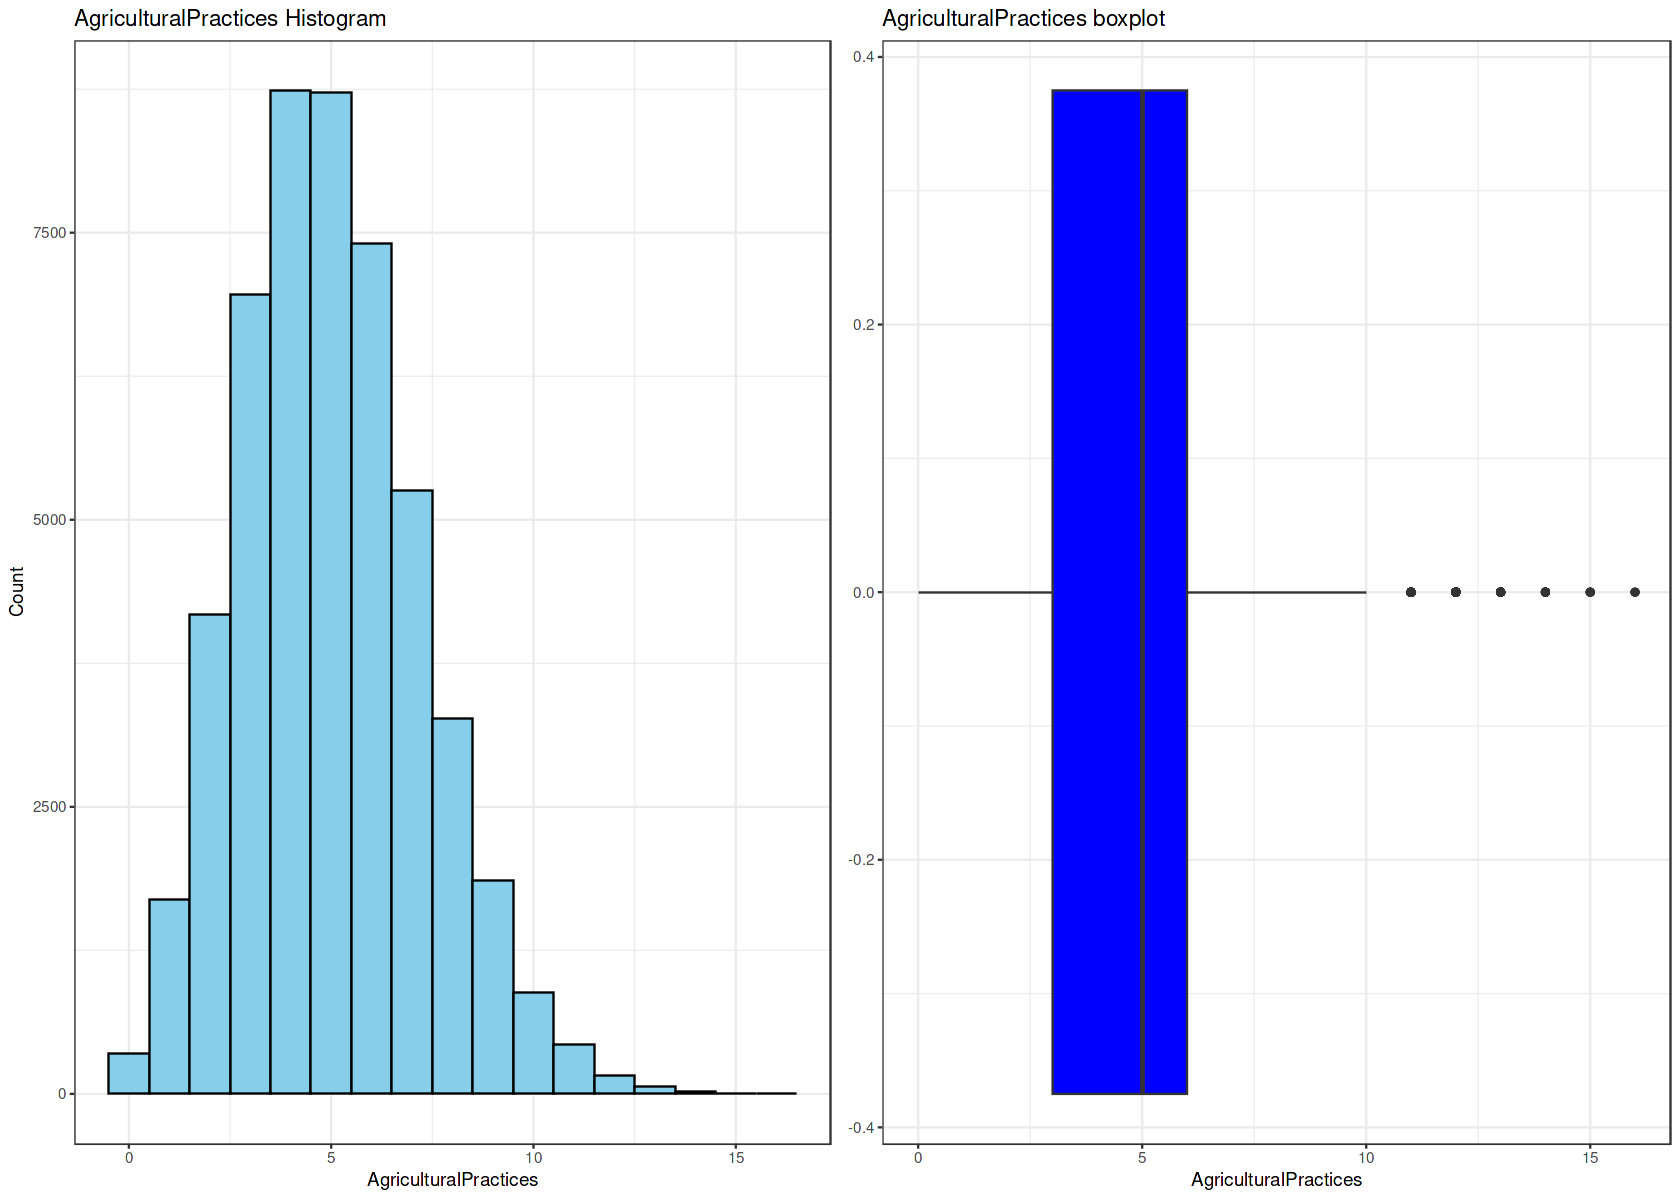

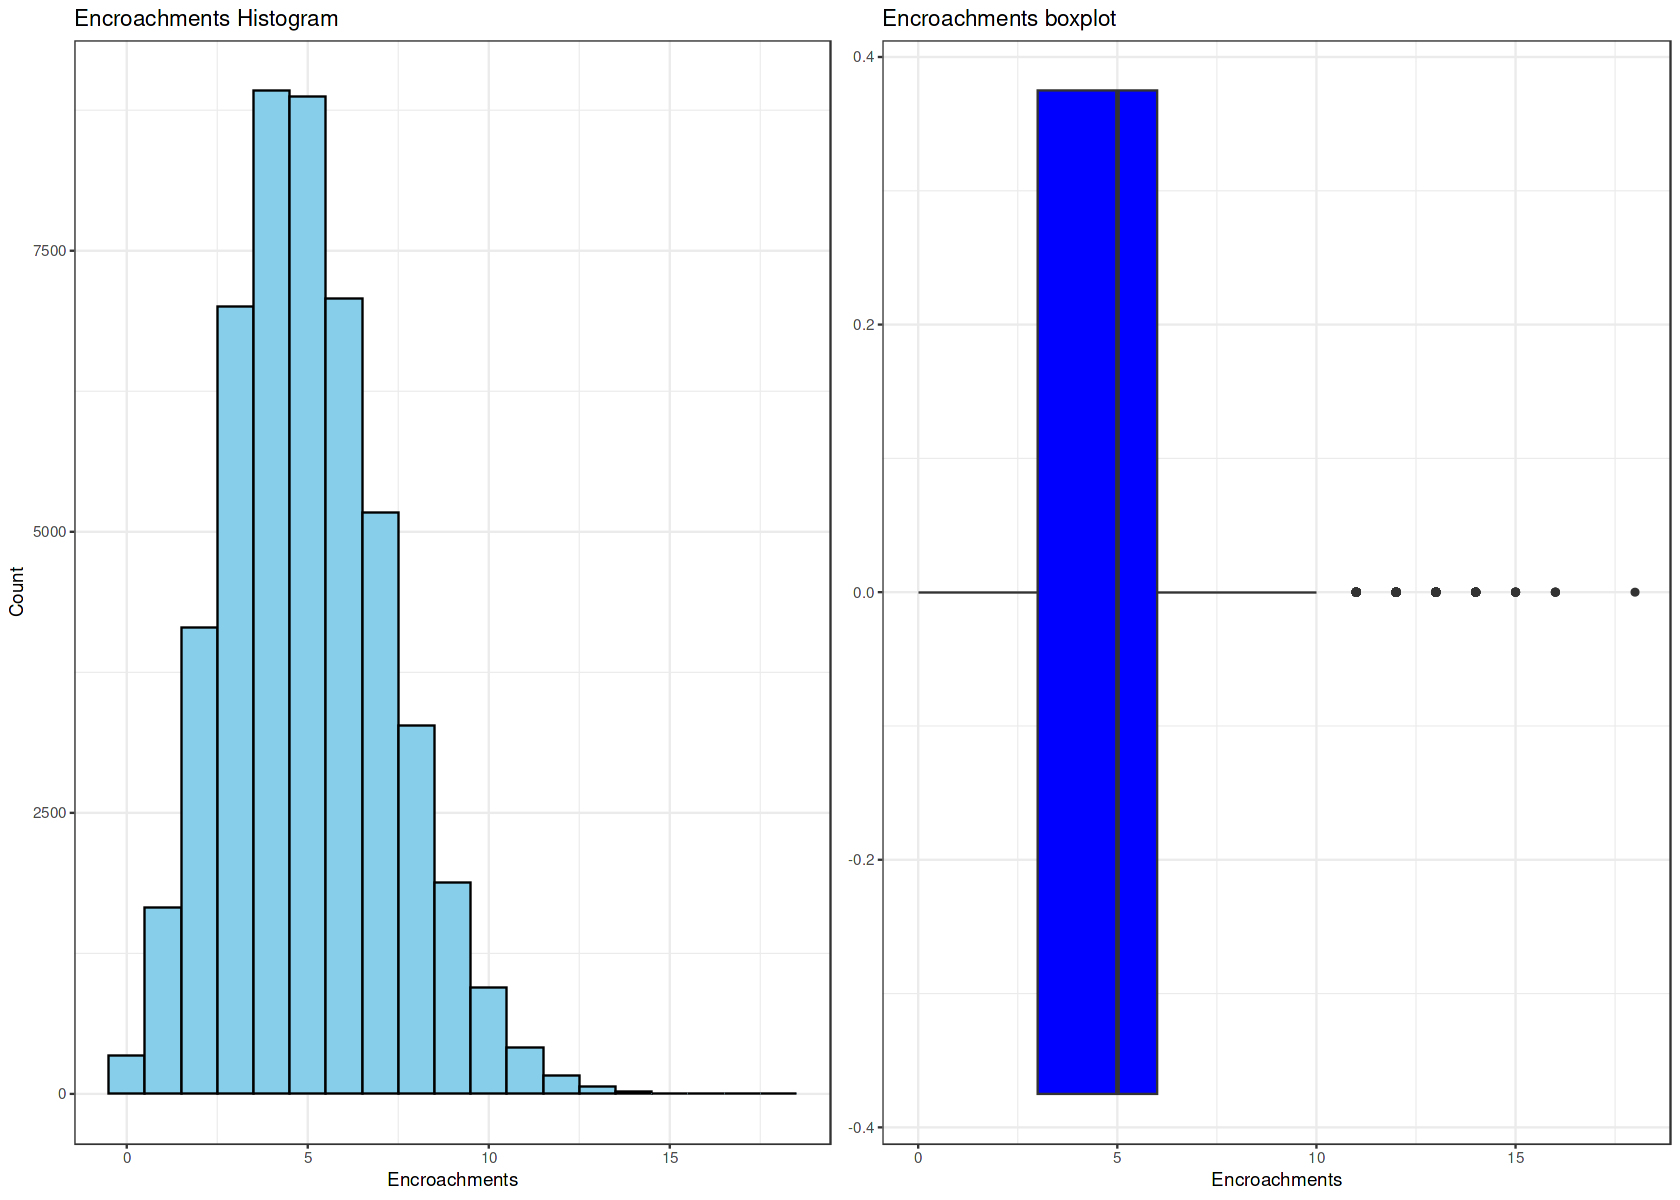

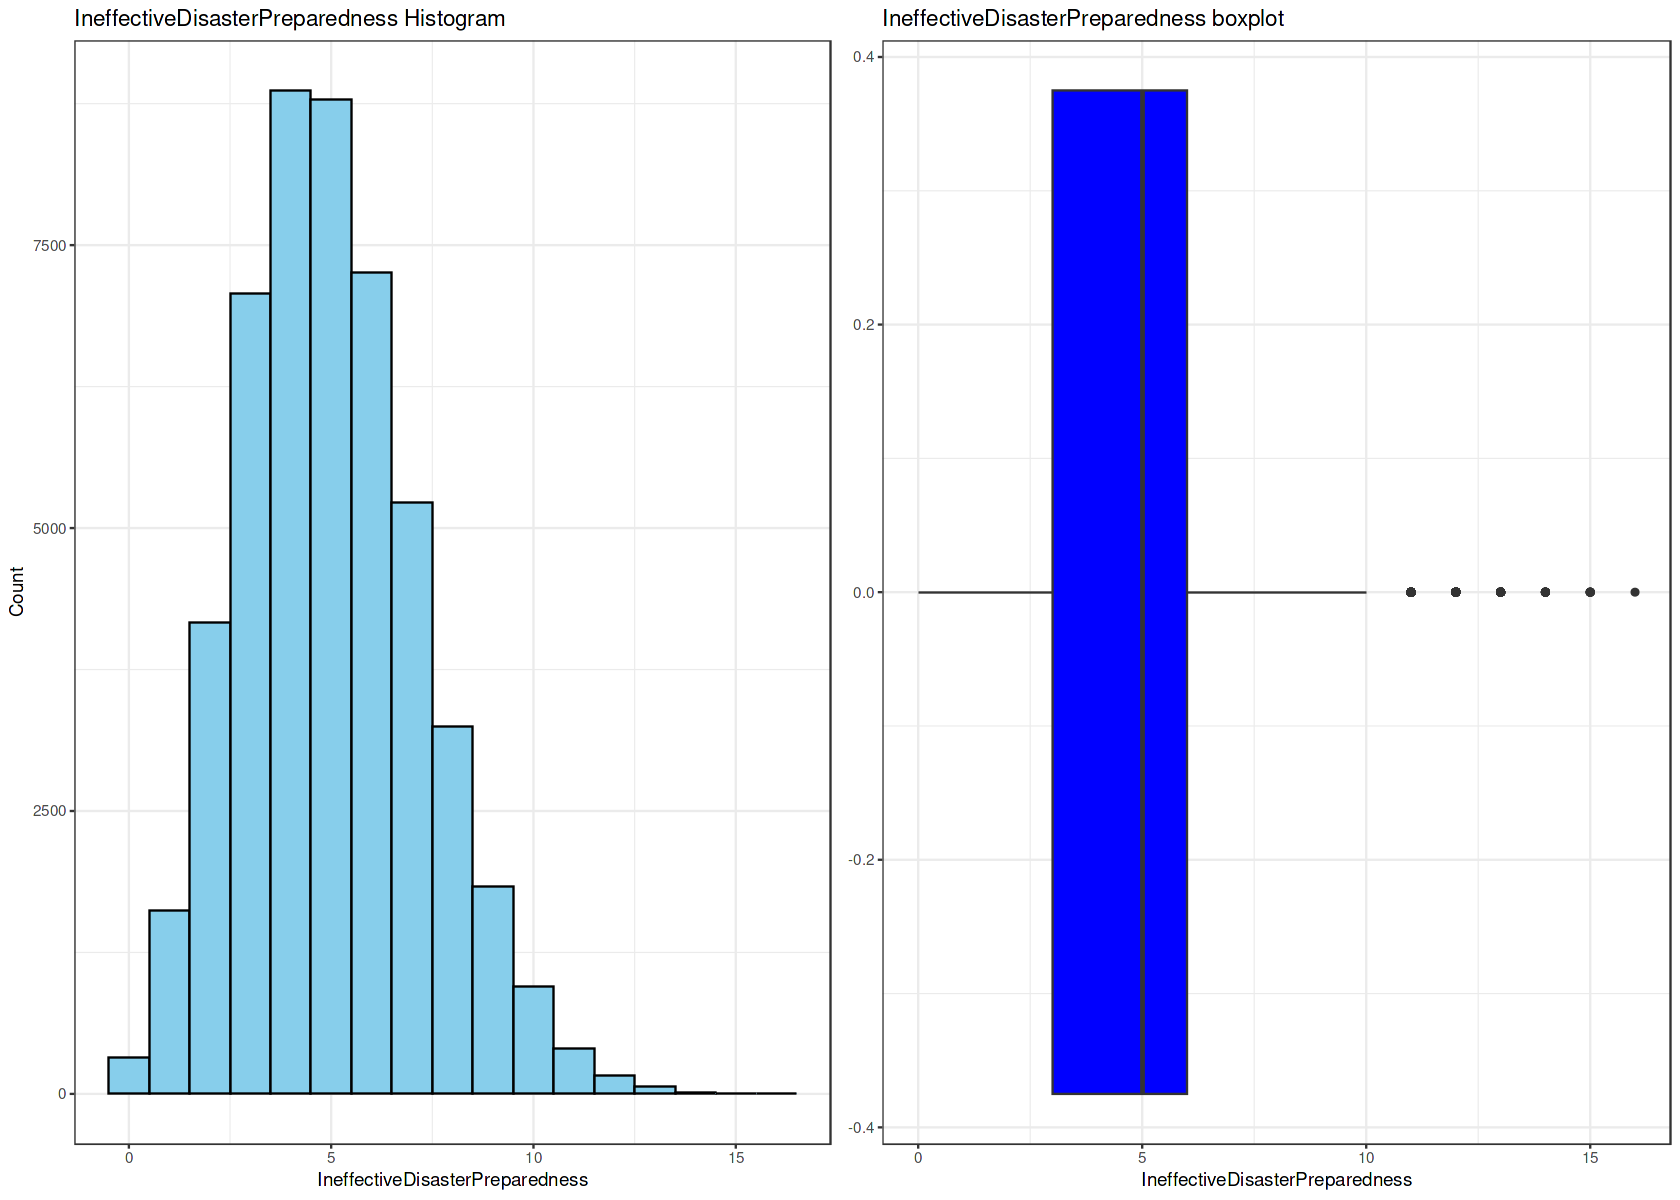

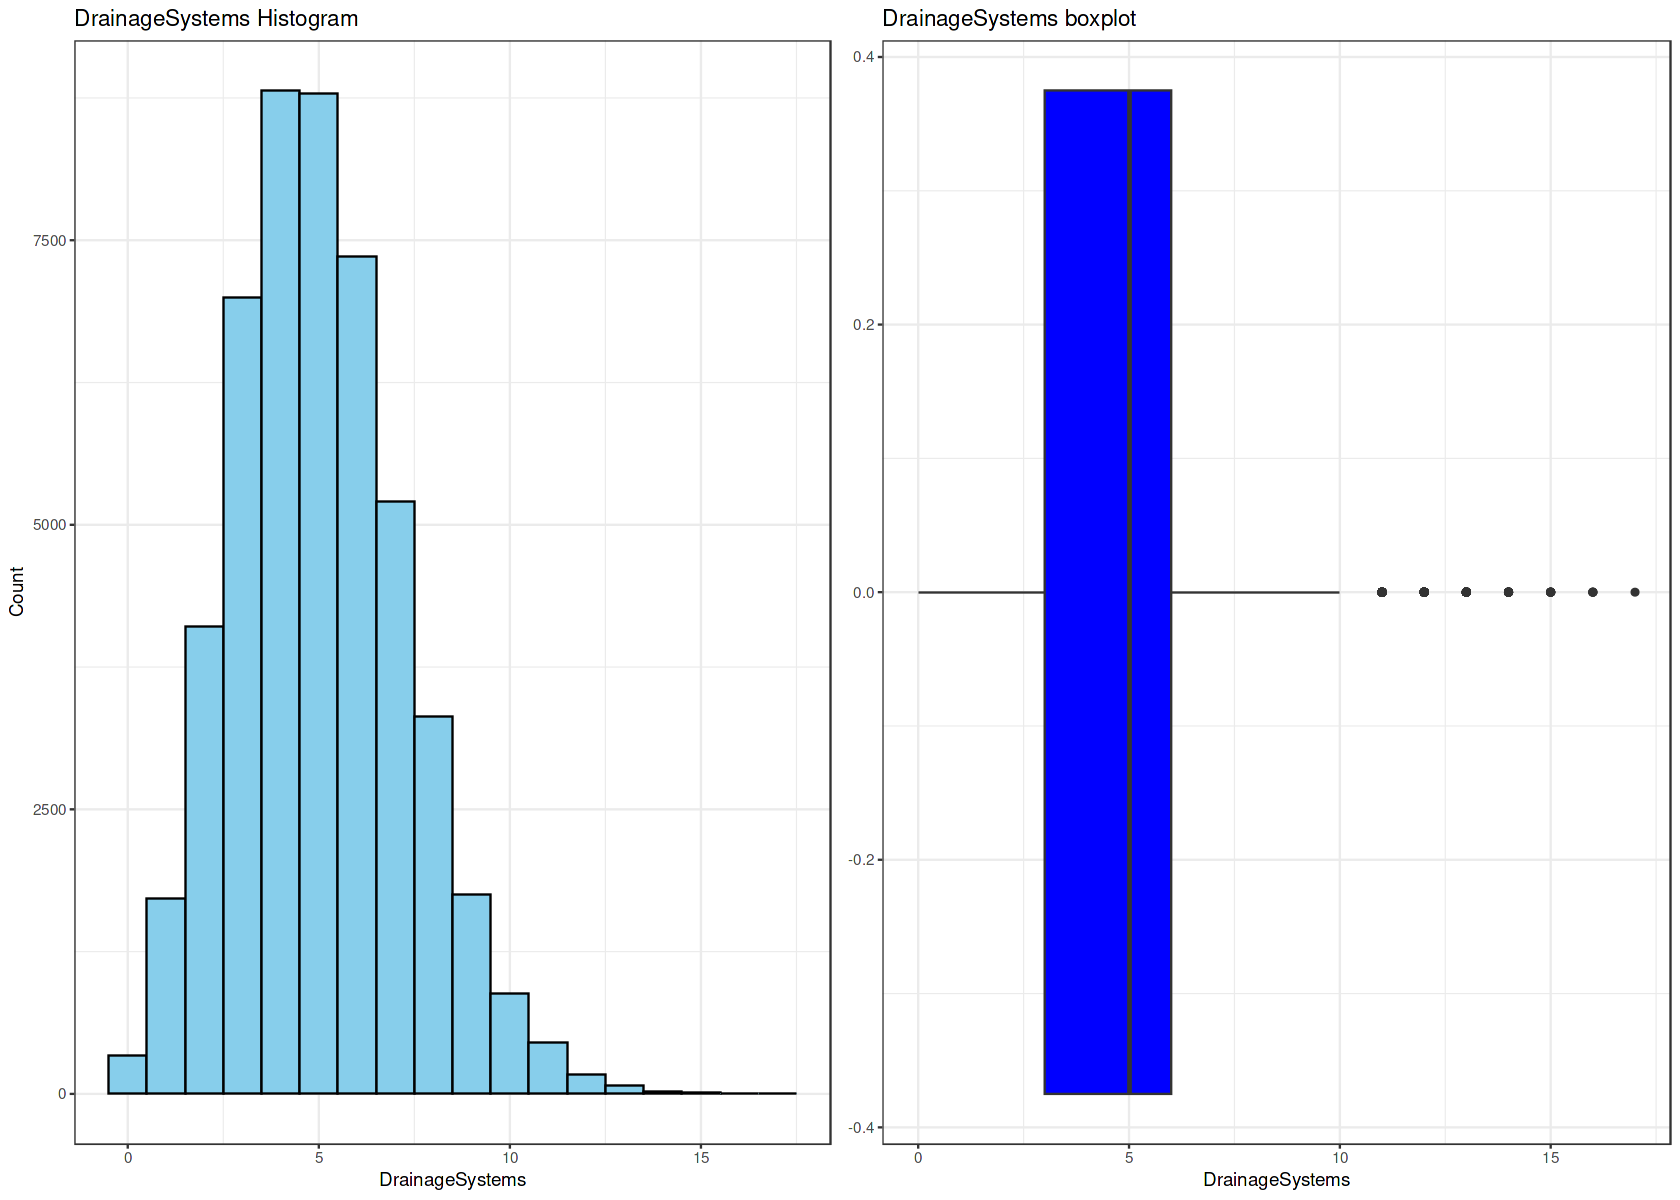

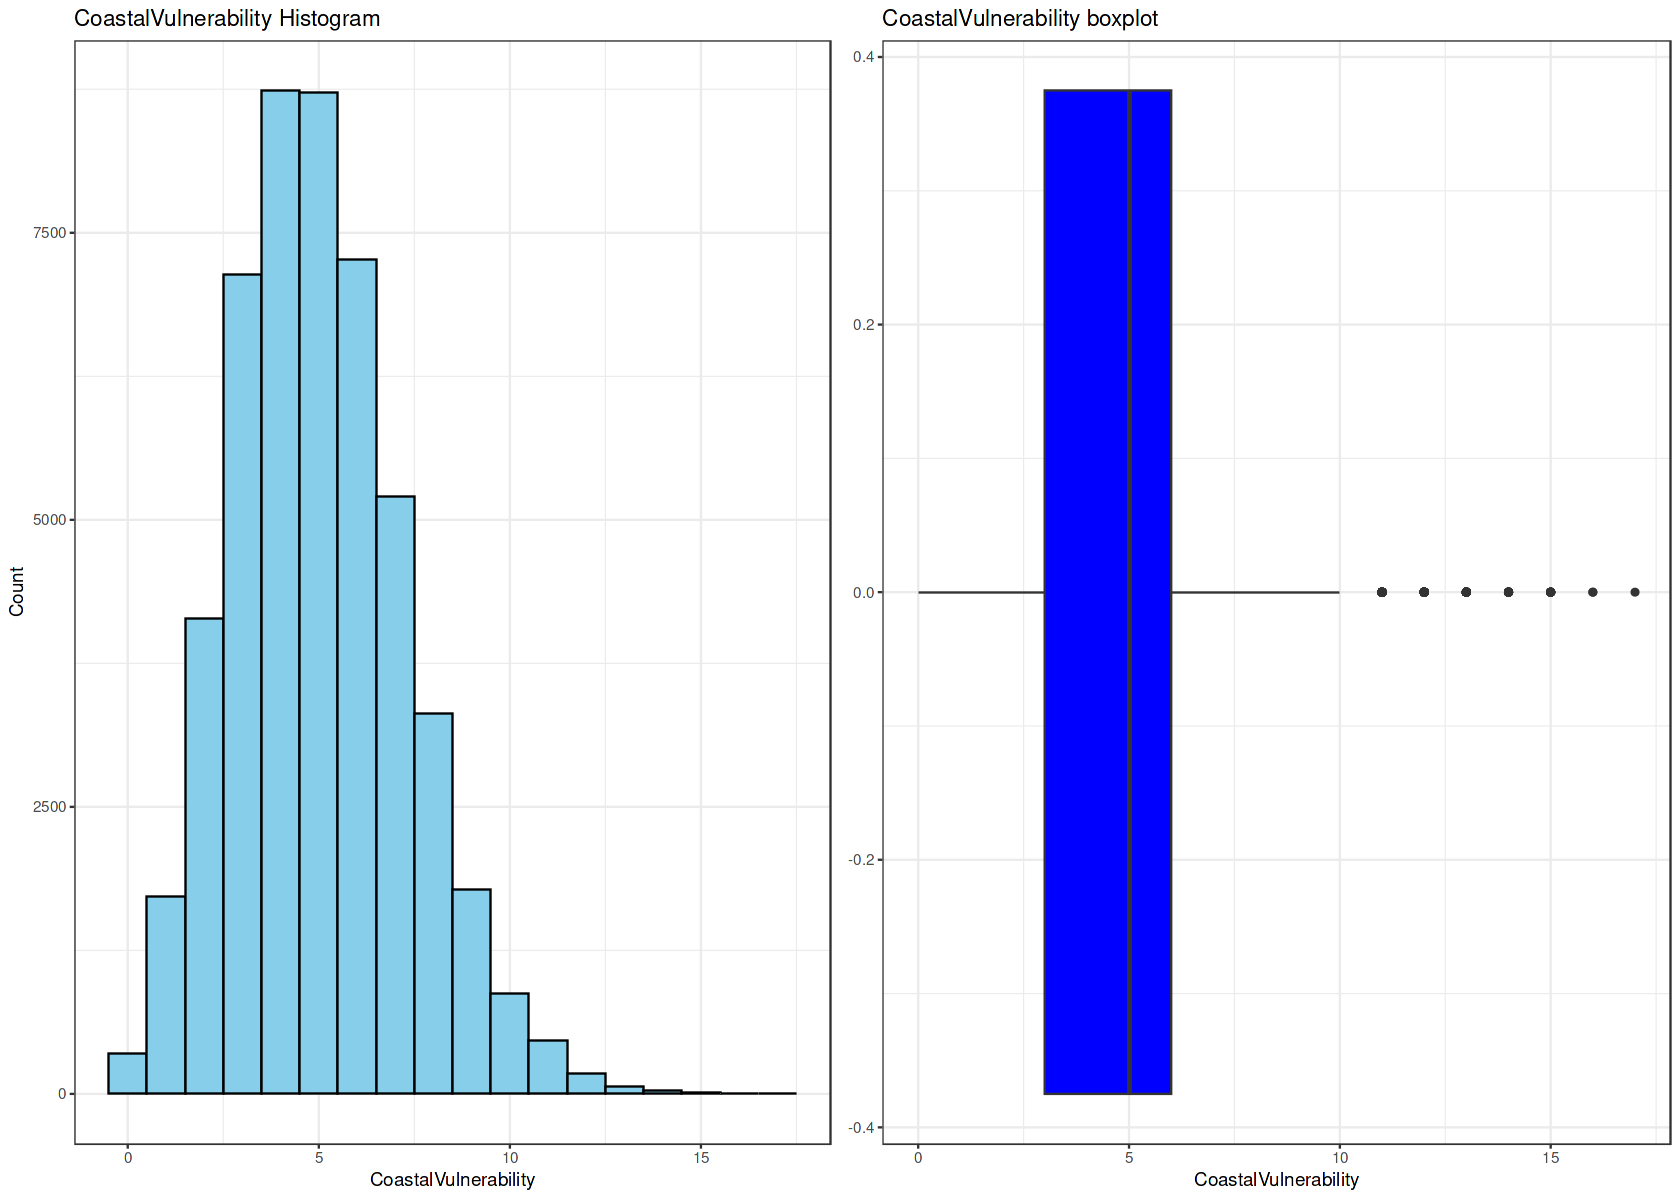

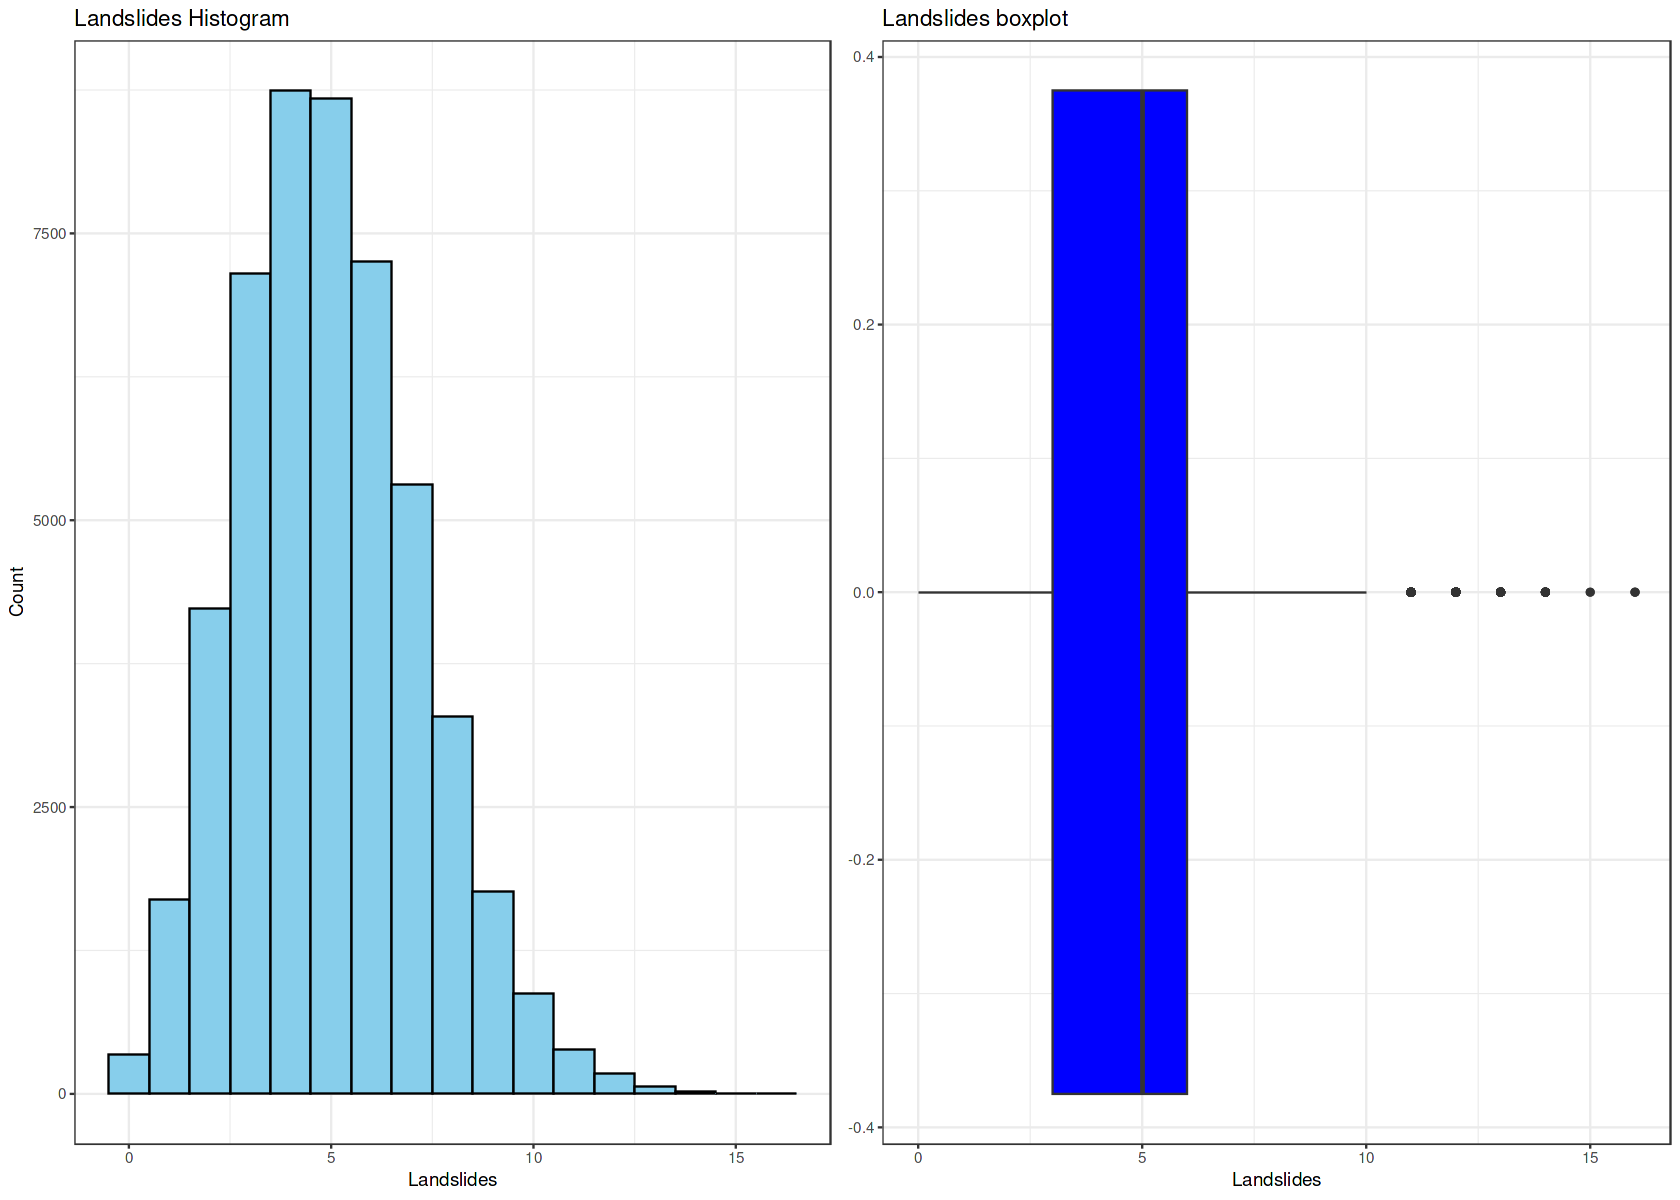

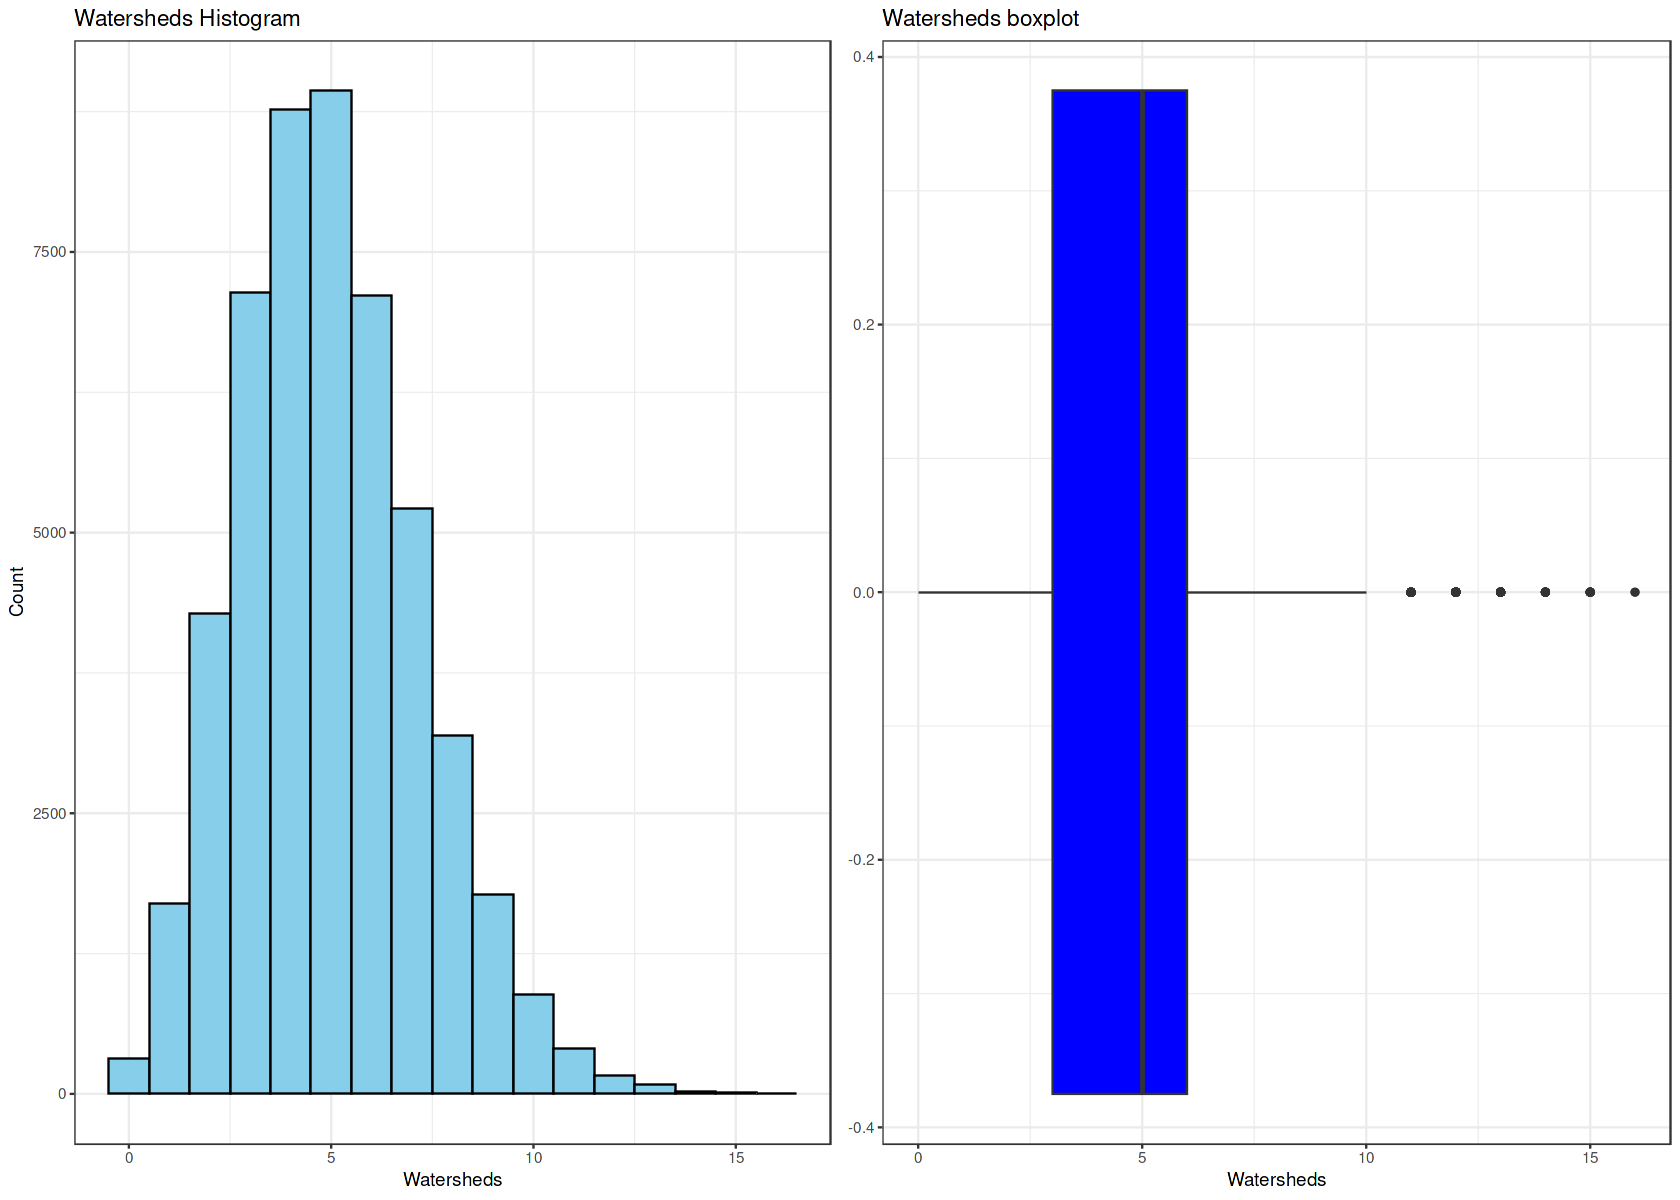

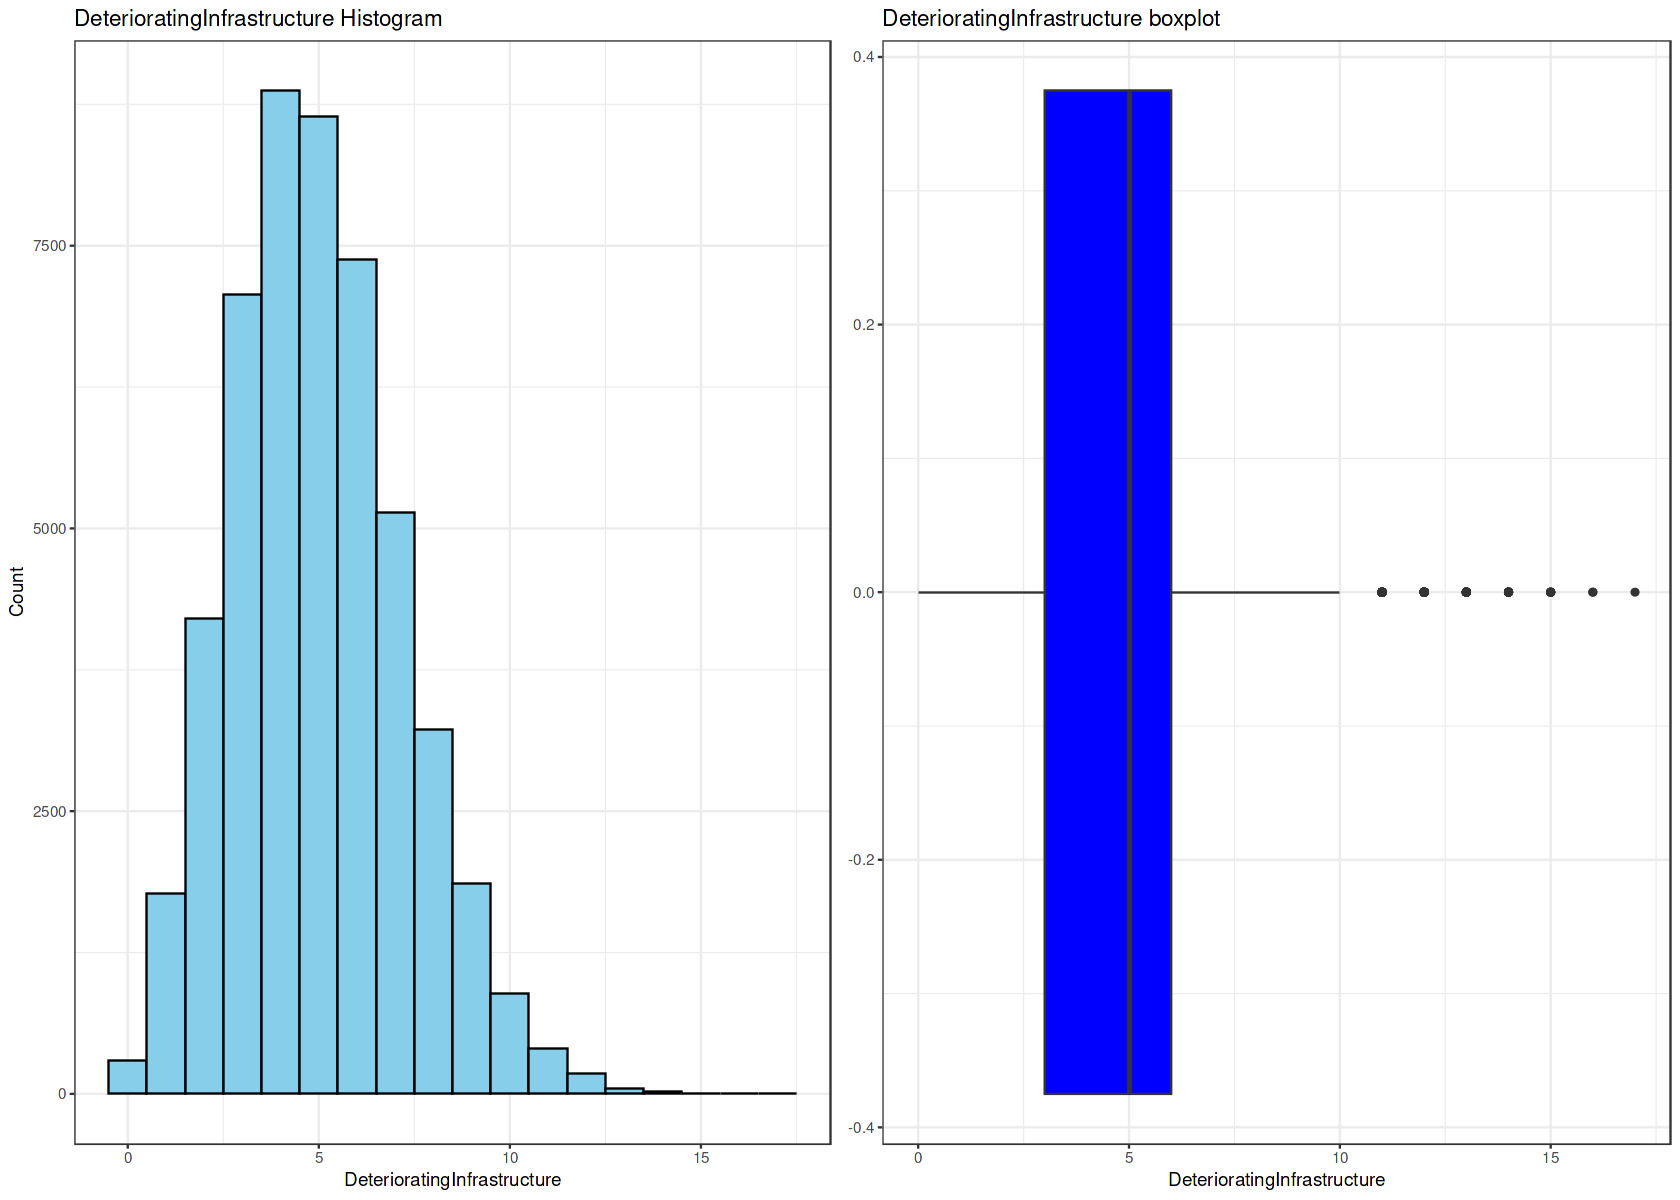

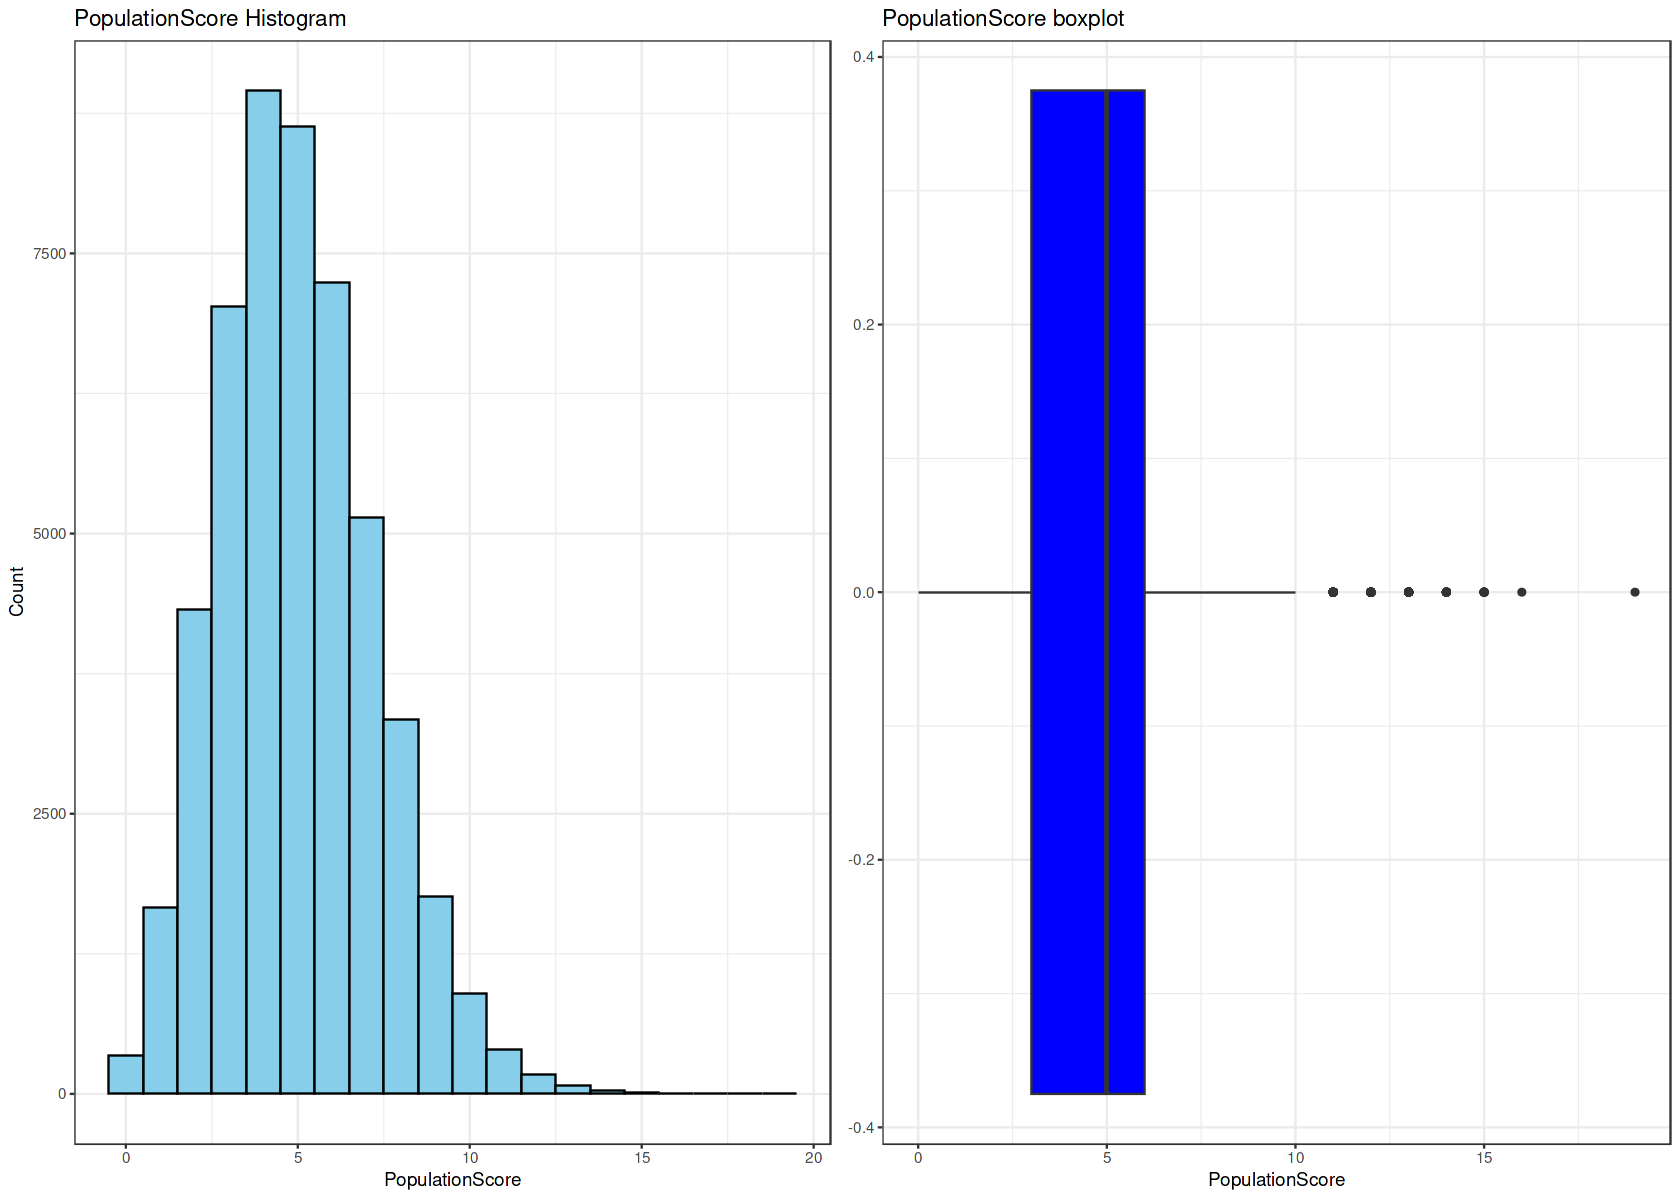

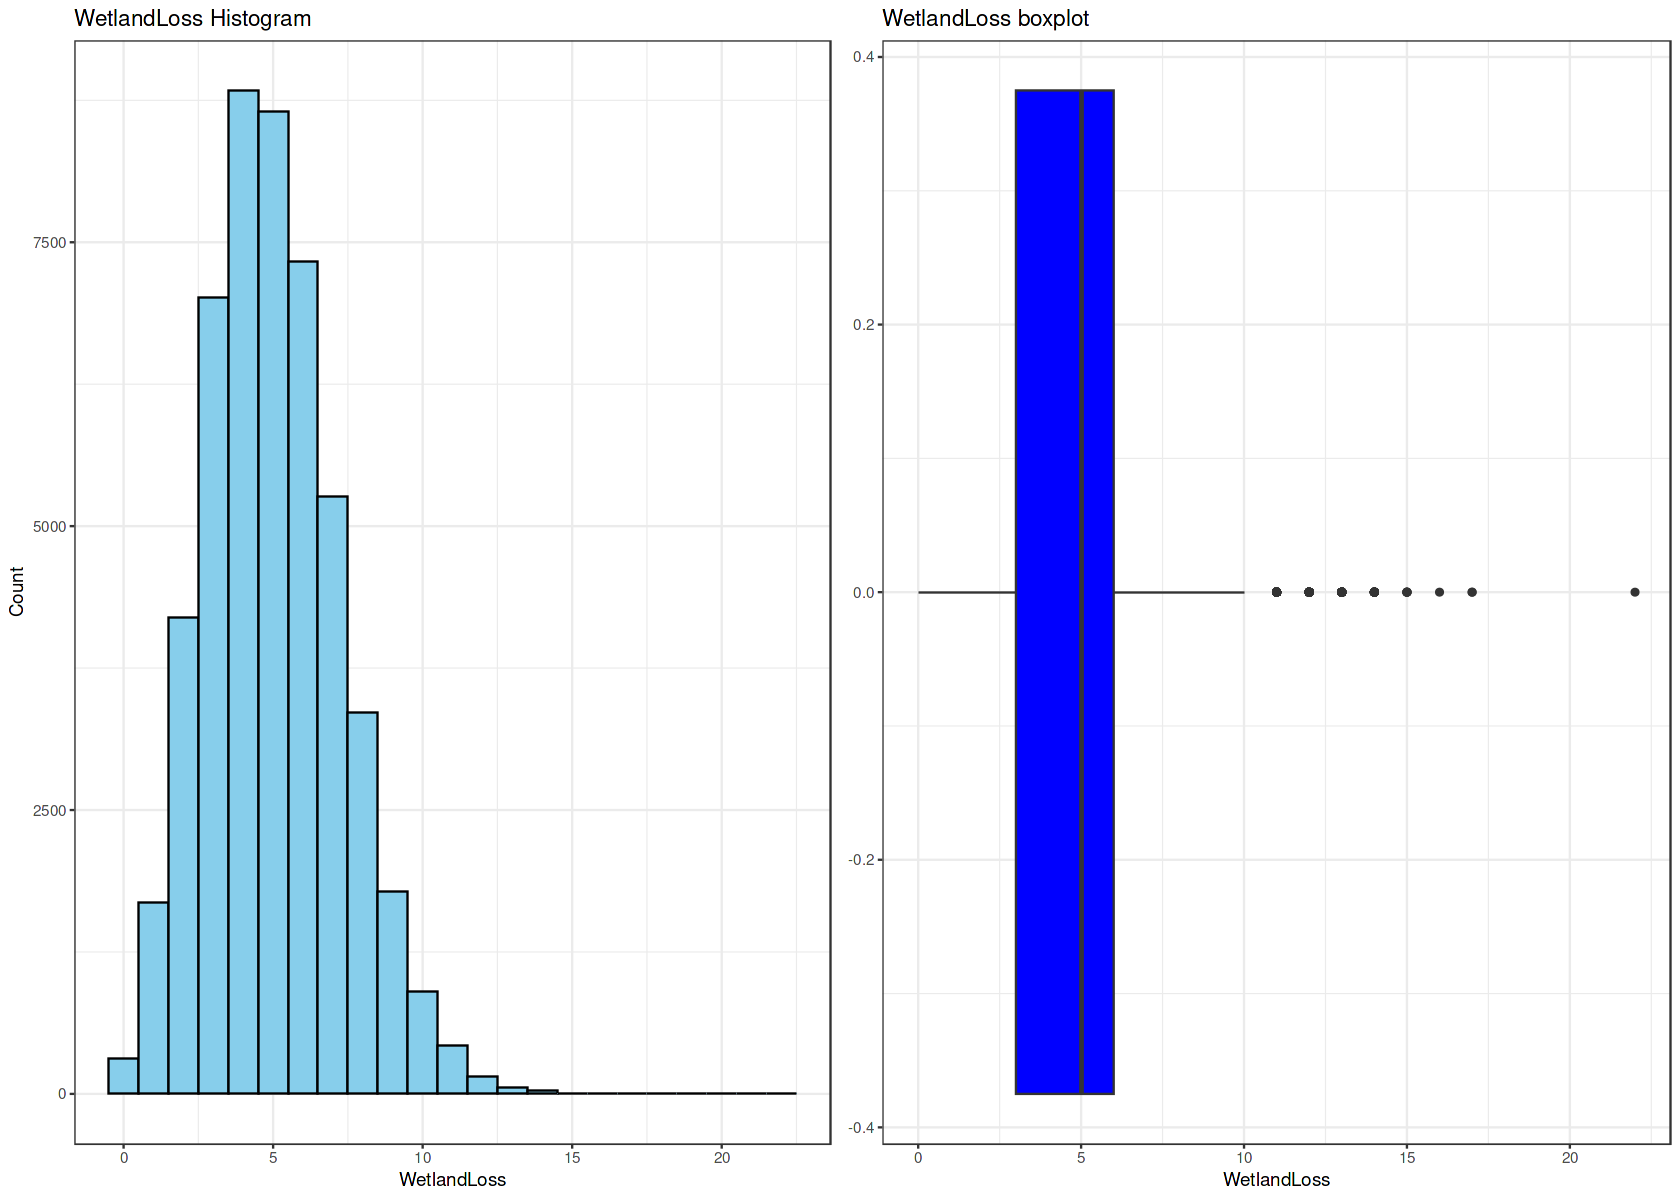

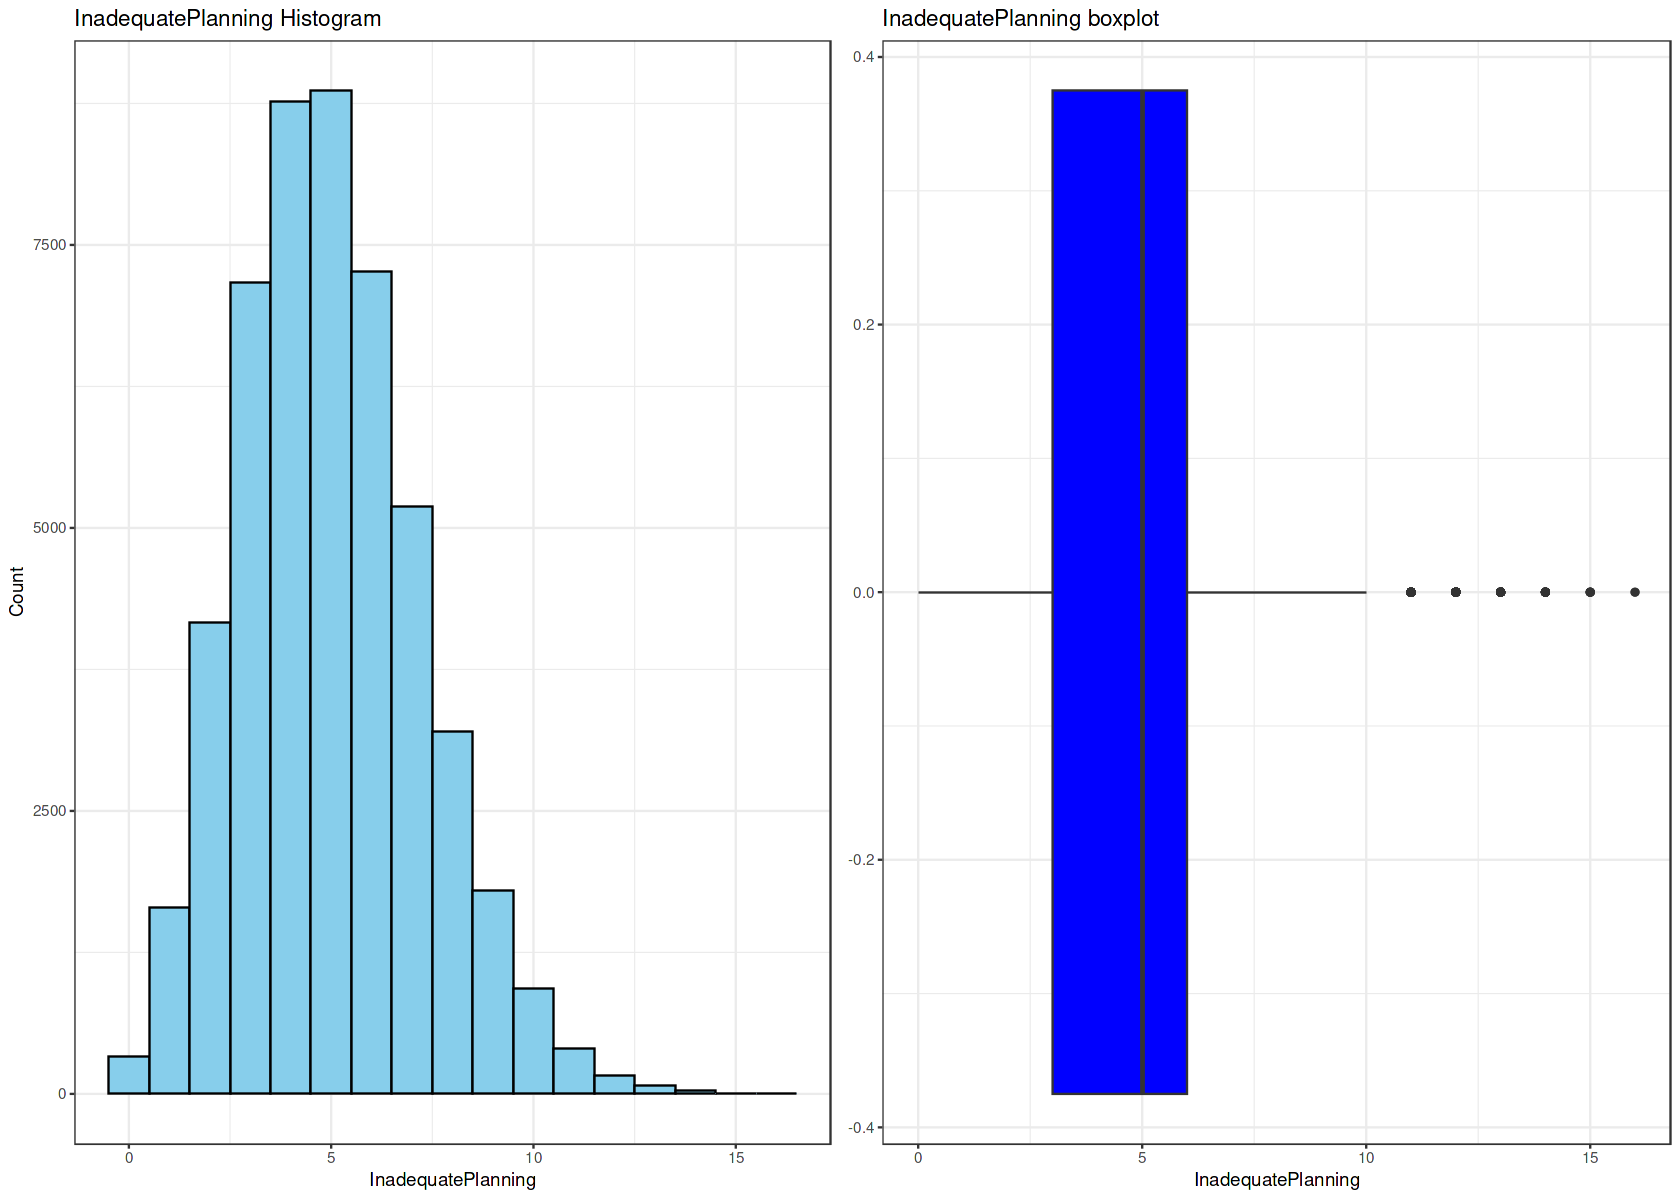

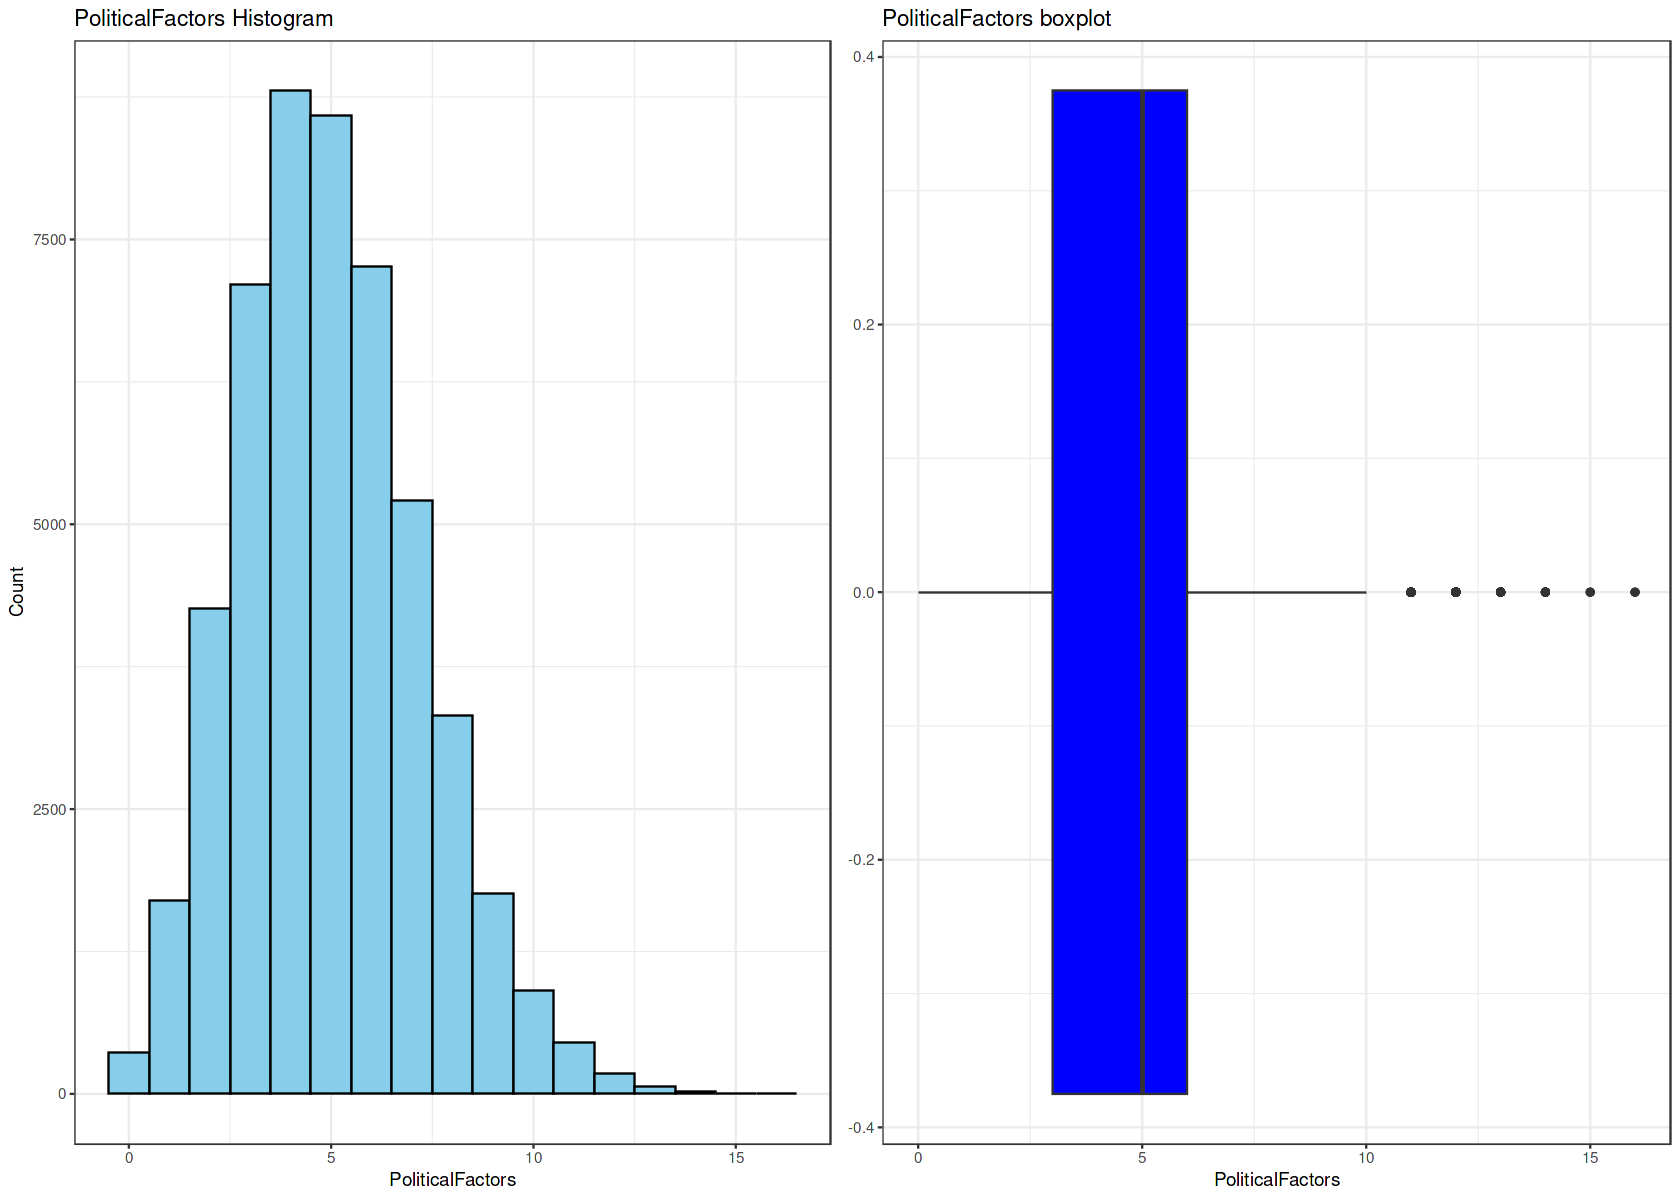

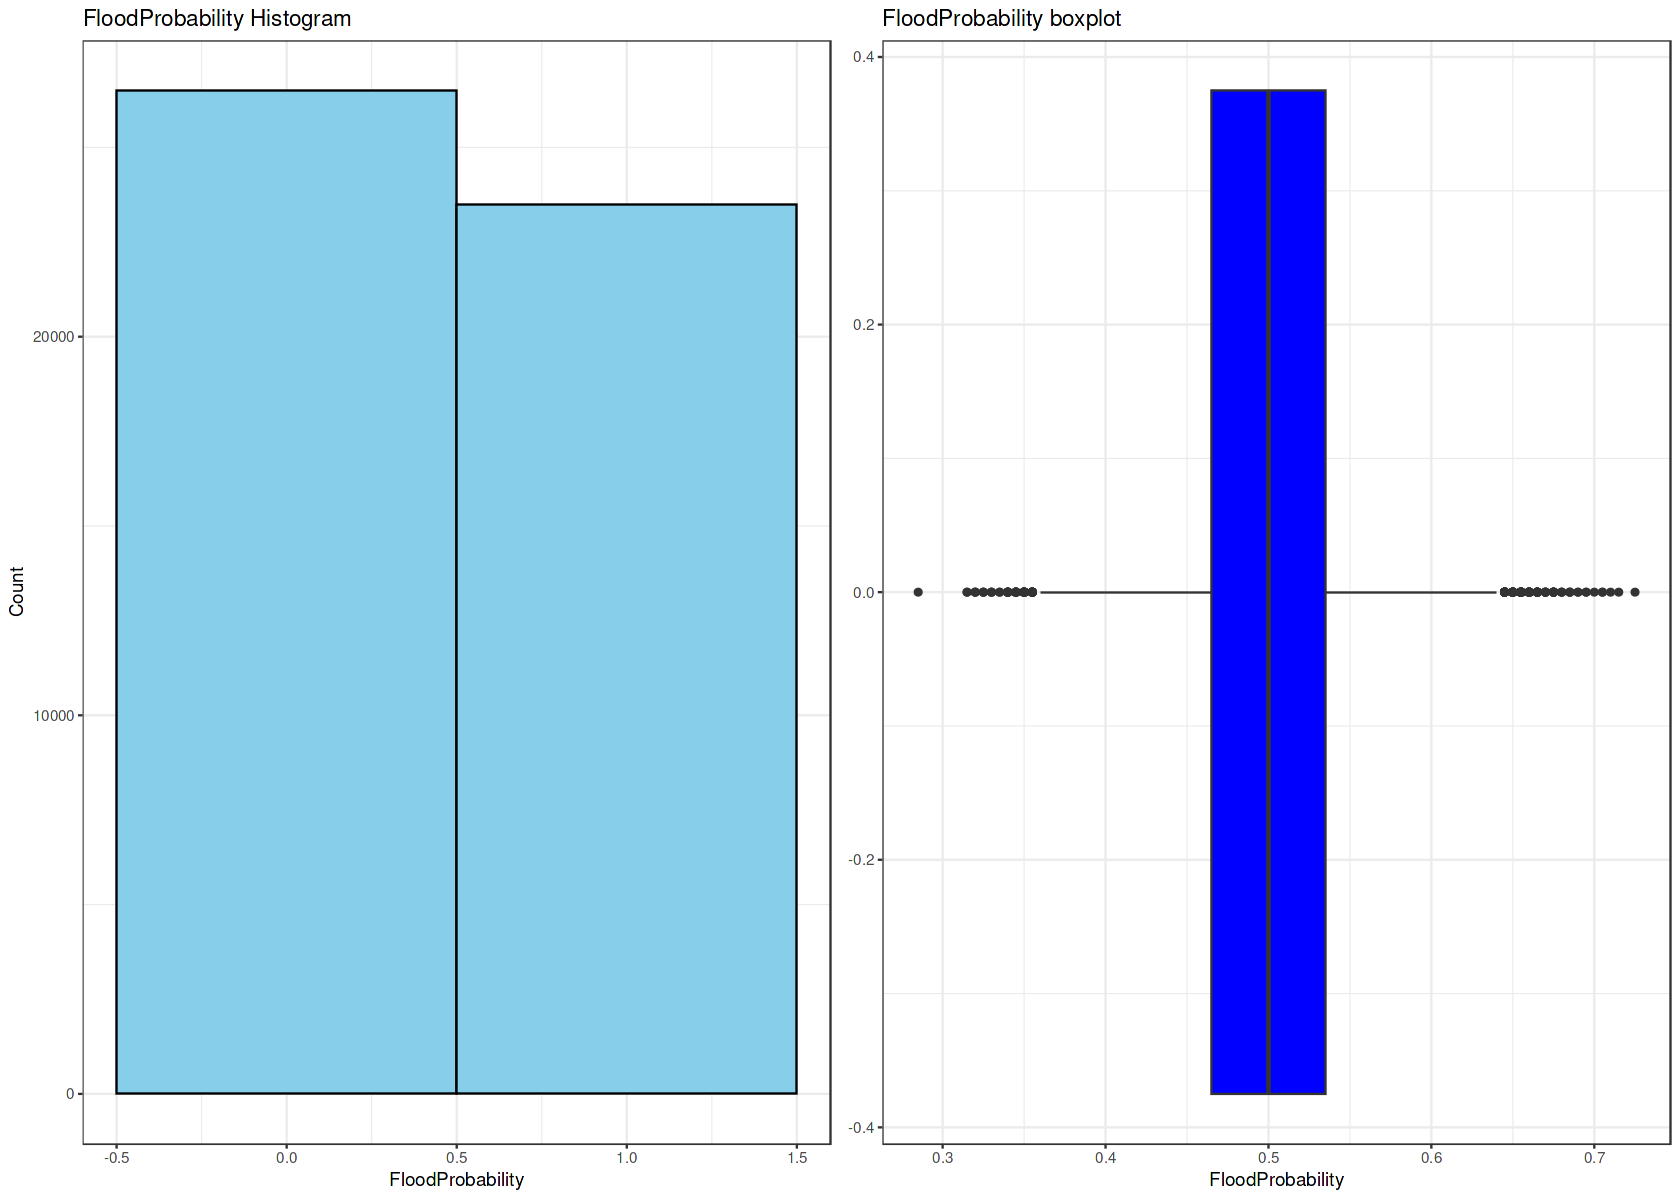

In [246]:
for(i in 1:length(num_cols)){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', binwidth = 1, position = 'dodge') + 
            labs(title = paste0(names(df[i]),' Histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw()
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'blue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i])) + 
            theme_bw()
    
    grid.arrange(a,b , ncol = 2)    
}    

## **Correlation**

In [247]:
options(repr.plot.width = 14.0, repr.plot.height = 14.0)

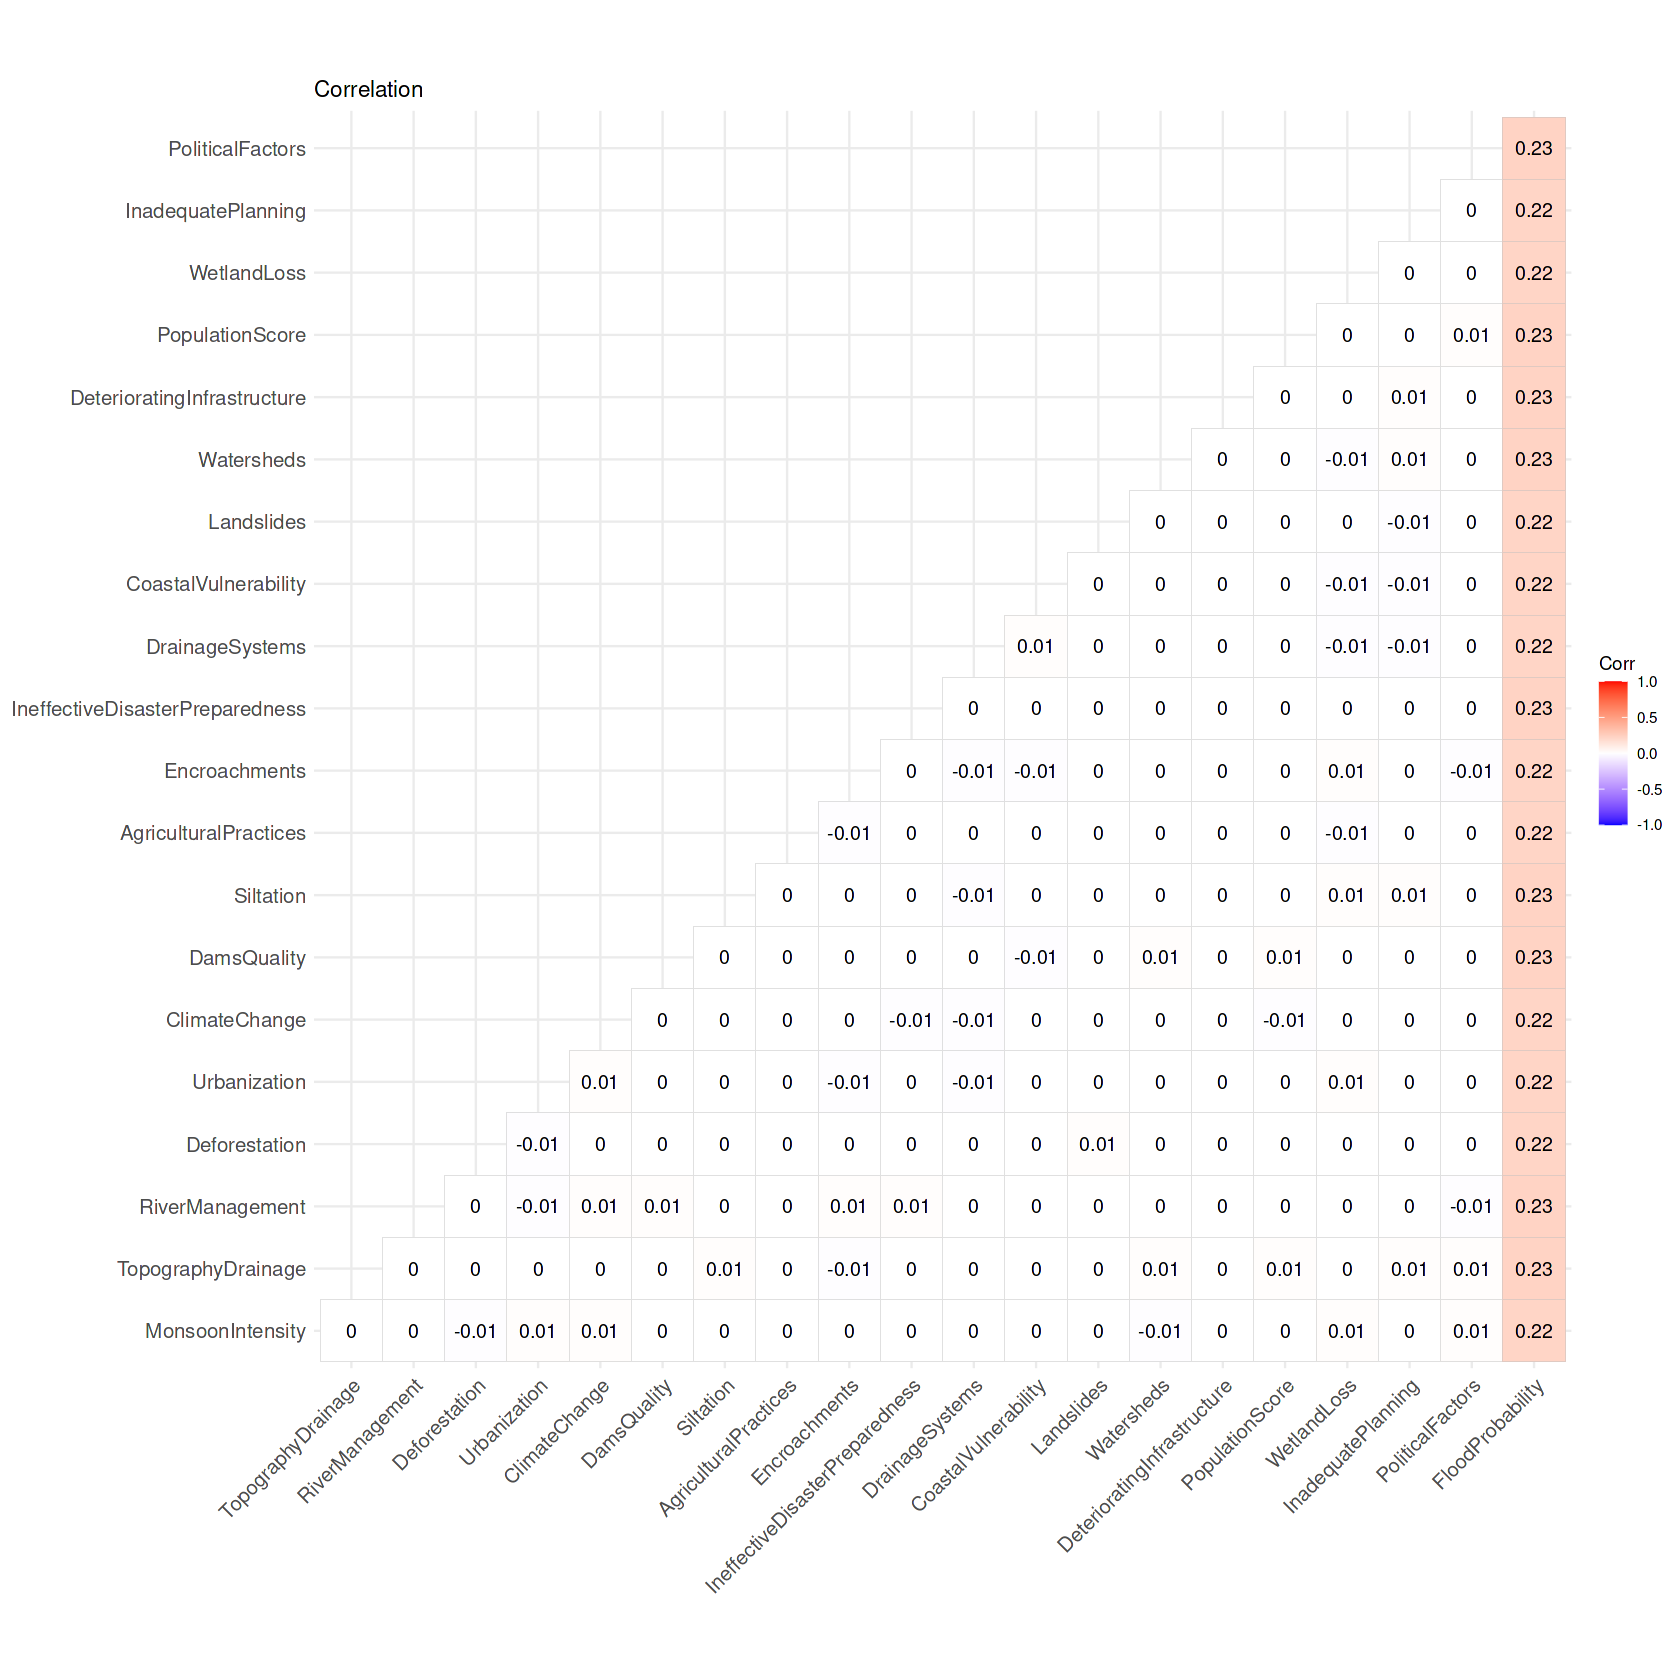

In [248]:
ggcorrplot(cor(df) , type = "lower", lab=T, title = 'Correlation')

# **3. Modeling**

In [249]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(randomForest)
library(Metrics)

In [250]:
idx <- sample(1:nrow(df), 0.7 * nrow(df))
train <- df[idx,]
test <- df[-idx,]

In [251]:
head(train)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,⋯,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
29865,8,6,8,4,2,7,4,0,4,7,⋯,6,2,10,3,1,12,2,3,6,0.505
42955,7,5,6,4,3,7,6,3,5,9,⋯,5,5,6,6,2,6,5,3,4,0.510
7936,5,4,4,5,2,6,5,4,3,6,⋯,5,5,3,3,7,5,5,5,7,0.480
48812,5,7,4,5,4,3,4,1,7,9,⋯,7,5,2,5,7,5,3,10,3,0.510
31768,4,6,2,5,3,4,6,9,5,5,⋯,6,5,4,7,6,8,2,6,8,0.530
43411,6,1,4,4,3,6,3,5,7,2,⋯,4,6,5,5,2,3,4,3,7,0.435


## **Linear Regression**

In [252]:
model_lm <- lm(FloodProbability ~ ., data = train)

In [253]:
summary(model_lm)


Call:
lm(formula = FloodProbability ~ ., data = train)

Residuals:
                  Min                    1Q                Median 
-0.000000000000119445 -0.000000000000000019  0.000000000000000004 
                   3Q                   Max 
 0.000000000000000027  0.000000000000001112 

Coefficients:
                                                Estimate
(Intercept)                     -0.000000000000000707379
MonsoonIntensity                 0.004999999999999997502
TopographyDrainage               0.004999999999999998369
RiverManagement                  0.005000000000000000104
Deforestation                    0.005000000000000001839
Urbanization                     0.005000000000000000104
ClimateChange                    0.005000000000000000971
DamsQuality                      0.005000000000000001839
Siltation                        0.005000000000000003574
AgriculturalPractices            0.005000000000000000104
Encroachments                    0.004999999999999999237
Ineffecti

In [254]:
pred_lm <- predict(model_lm, test)

In [255]:
lm_mse <- mse(test$FloodProbability, pred_lm)
lm_rmse <- rmse(test$FloodProbability, pred_lm)
lm_mae <- mae(test$FloodProbability,pred_lm)
lm_r2 <- R2(test$FloodProbability,pred_lm)

In [256]:
options(scipen = 50)

In [257]:
lm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
lm_score

Indicators,Score
<chr>,<dbl>
MSE,0.0000000000000000000000000000004893241
RMSE,0.0000000000000006995170127311016543893
MAE,0.0000000000000006974384033261079004168
R2,1.0000000000000000000000000000000000000


## **Simple XGB model**

In [258]:
xgb_rec <-
  recipe(FloodProbability ~ ., data = train) %>% 
      step_dummy(all_nominal_predictors()) %>%
      step_YeoJohnson(all_numeric_predictors())

In [259]:
xgb_spec <-
  boost_tree() %>%
  set_engine(engine = 'xgboost') %>%
  set_mode(mode = 'regression')

In [260]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Computational engine: xgboost 


In [261]:
model_xgb =
  xgb_wf %>% 
  fit(train) %>%
  with_seed(7, .)

In [262]:
pred_xgb <- predict(model_xgb, test)

In [263]:
head(pred_xgb)

.pred
<dbl>
0.5289044
0.5068921
0.5728482
0.4599850
0.4605233
0.4996201


In [264]:
xgb_mse <- mse(test$FloodProbability, pred_xgb$.pred)
xgb_rmse <- rmse(test$FloodProbability, pred_xgb$.pred)
xgb_mae <- mae(test$FloodProbability,pred_xgb$.pred)
xgb_r2 <- R2(test$FloodProbability,pred_xgb$.pred)

In [265]:
xgb_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(xgb_mse,xgb_rmse, xgb_mae, xgb_r2 ))
xgb_score

Indicators,Score
<chr>,<dbl>
MSE,0.0007084042
RMSE,0.0266158638
MAE,0.0210973727
R2,0.7730439606


## **Simple LightBGM Model**

In [266]:
lgbm_rec <-
  recipe(FloodProbability ~ ., data = train) %>% 
  step_dummy(all_nominal_predictors()) %>%
  step_YeoJohnson(all_numeric_predictors())

In [267]:
lgbm_spec <-
  boost_tree() %>%
  set_engine(engine = 'lightgbm') %>%
  set_mode(mode = 'regression')

In [268]:
lgbm_wf <- workflow() %>%
  add_recipe(lgbm_rec) %>%
  add_model(lgbm_spec)

lgbm_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Computational engine: lightgbm 


In [269]:
model_lgbm =
  lgbm_wf %>% 
  fit(train) %>%
  with_seed(7, .)

In [270]:
pred_lgbm <- predict(model_lgbm, test)

In [271]:
lgbm_mse <- mse(test$FloodProbability, pred_lgbm$.pred)
lgbm_rmse <- rmse(test$FloodProbability, pred_lgbm$.pred)
lgbm_mae <- mae(test$FloodProbability,pred_lgbm$.pred)
lgbm_r2 <- R2(test$FloodProbability,pred_lgbm$.pred)

In [272]:
lgbm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lgbm_mse,lgbm_rmse ,lgbm_mae, lgbm_r2 ))
lgbm_score

Indicators,Score
<chr>,<dbl>
MSE,0.0001913079
RMSE,0.0138314113
MAE,0.0105927892
R2,0.9498425404


## **RandomForest model**

In [273]:
model_rf <- randomForest(FloodProbability ~., data = train, ntree=300)

In [274]:
model_rf


Call:
 randomForest(formula = FloodProbability ~ ., data = train, ntree = 300) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 6

          Mean of squared residuals: 0.0007137955
                    % Var explained: 71.51

In [275]:
pred_rf <- predict(model_rf,test)

In [276]:
rf_mse <- mse(test$FloodProbability, pred_rf)
rf_rmse <- rmse(test$FloodProbability, pred_rf)
rf_mae <- mae(test$FloodProbability,pred_rf)
rf_r2 <- R2(test$FloodProbability,pred_rf)

In [277]:
rf_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(rf_mse,rf_rmse ,rf_mae, rf_r2 ))
rf_score

Indicators,Score
<chr>,<dbl>
MSE,0.0006918319
RMSE,0.0263026966
MAE,0.0207482613
R2,0.9161945216


# **4. Evaluation**

In [278]:
model_evluation <- data.frame(MODEL = c('LR','XGB','LGBM','RF') , RMSE_SCORE = c(lm_rmse, xgb_rmse, lgbm_rmse, rf_rmse))

In [279]:
model_evluation

MODEL,RMSE_SCORE
<chr>,<dbl>
LR,0.000000000000000699517
XGB,0.026615863794424505367
LGBM,0.013831411327020830607
RF,0.026302696633207337668


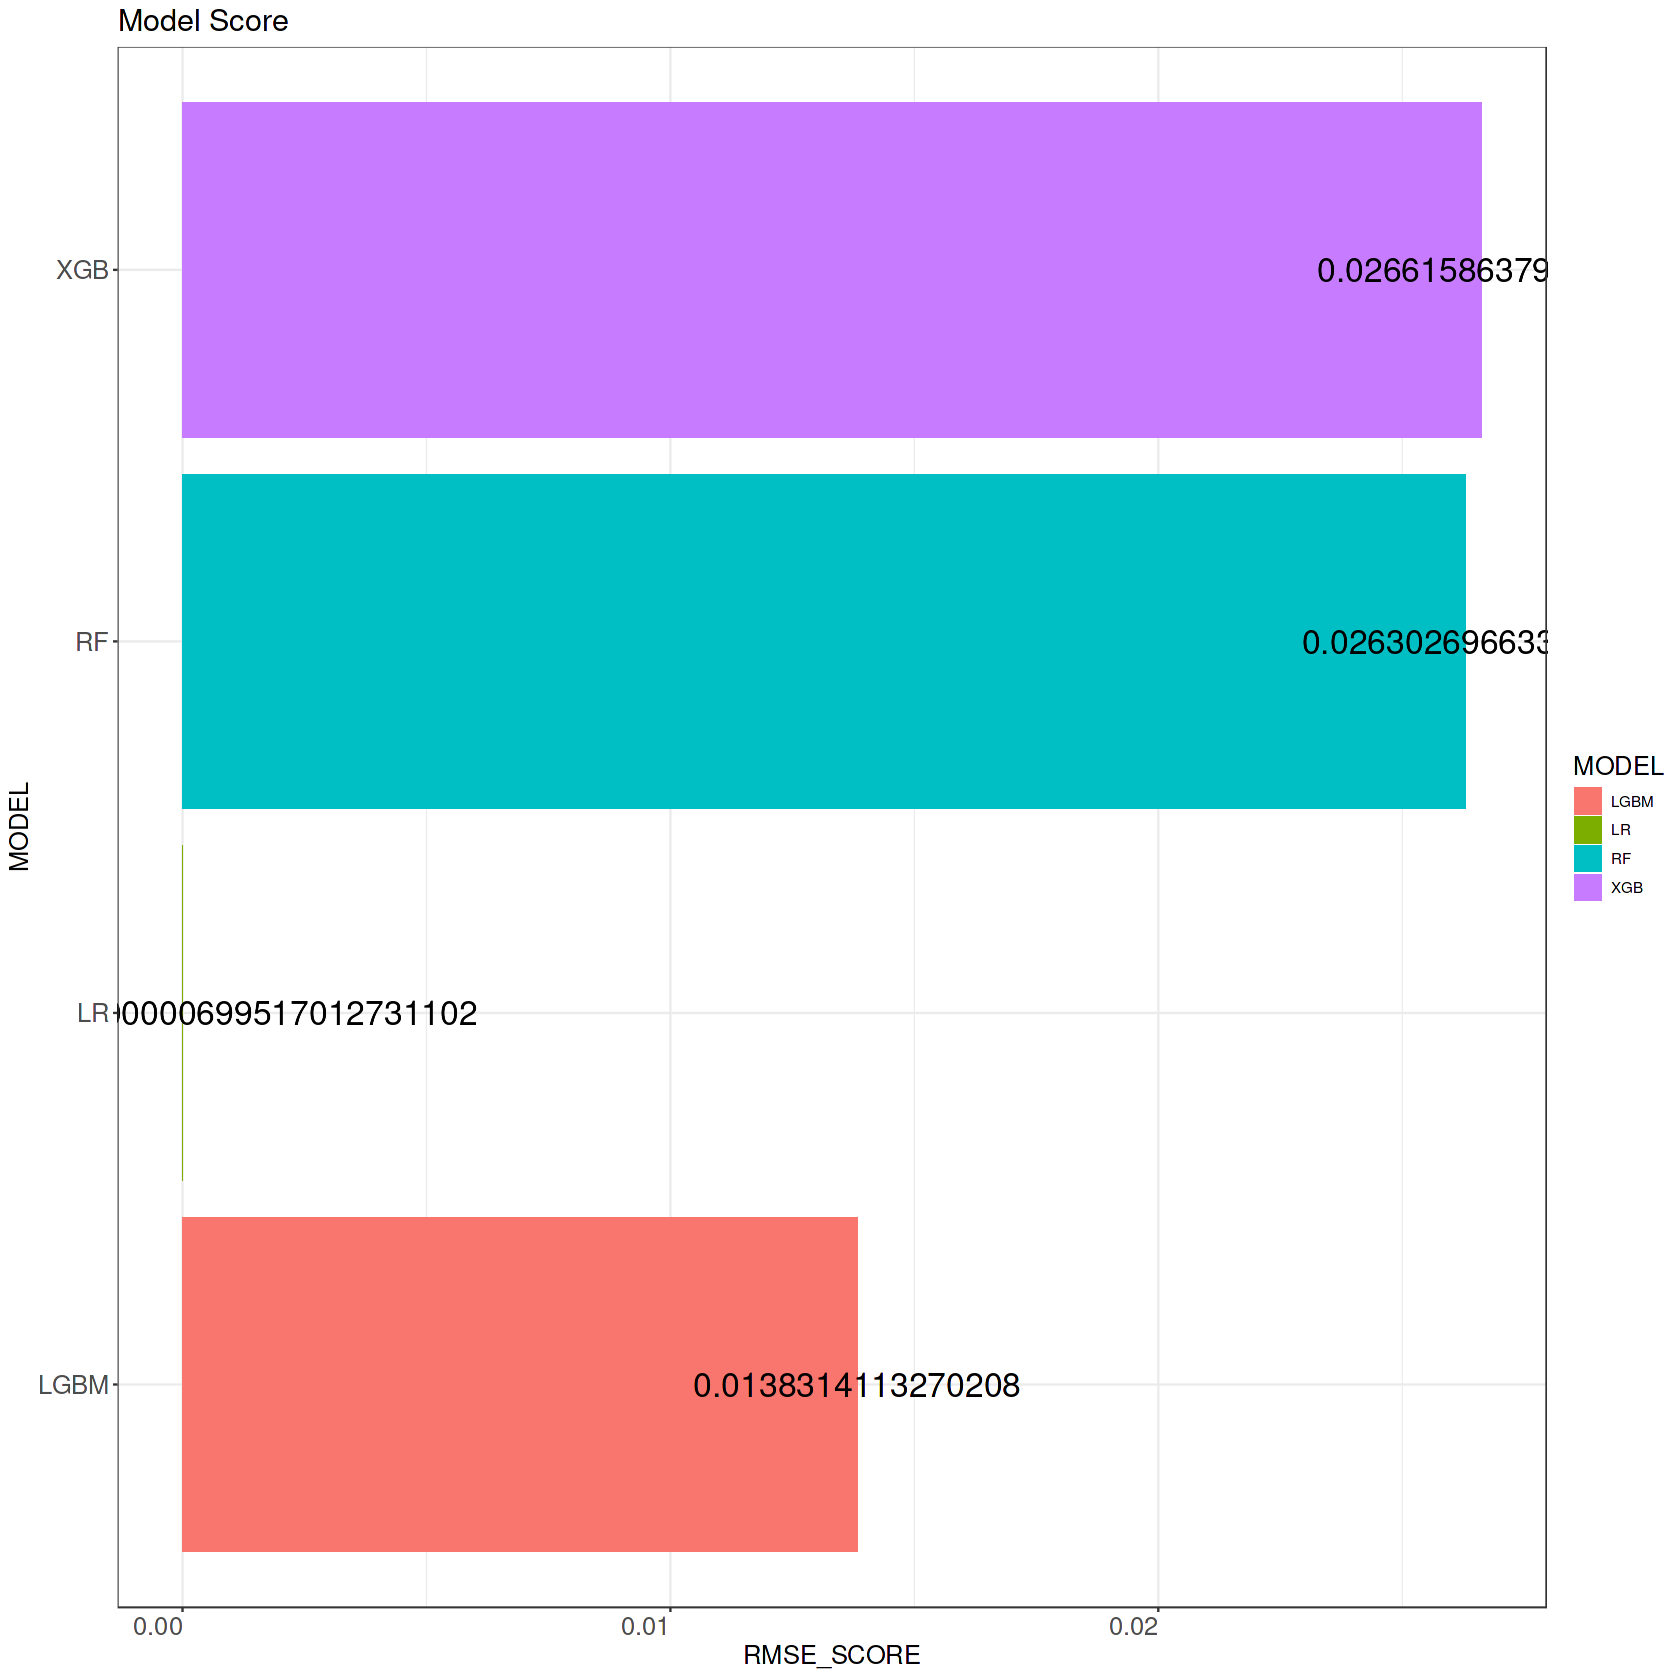

In [281]:
ggplot(model_evluation) + geom_col(aes(y=MODEL , x= RMSE_SCORE , fill = MODEL)) +
    geom_text(aes(y = MODEL , x= RMSE_SCORE, label= RMSE_SCORE), hjust=0.5, size = 7) +
    theme_bw() +
    ggtitle('Model Score') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, ),
    title = element_text(size=15)
    )

**Please leave your advice in the comments. Thank you**